In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from utils import get_feature_labels, get_binetflow_files, get_saved_data, get_classifier, mask_features
from binet_keras import get_tf_model


Using TensorFlow backend.


In [2]:
def plot_roc_curve(clfname, feature, label, name, test_size=0.5):
    
    feature = mask_features(feature)
    feat_train, feat_test, label_train, label_test = train_test_split(
                    feature, label, test_size=test_size, random_state=42)
    
    if clfname == 'tf':
        model = get_tf_model(dimension=17)
        model.fit(feat_train, label_train, nb_epoch=10, batch_size=32, verbose=False)
        y_score = model.predict_proba(feat_test, batch_size=32, verbose=0)
        _, acc = model.evaluate(feat_test, label_test, batch_size=32, verbose=False)
        print(acc)
        fpr, tpr, _ = roc_curve(label_test, y_score[:])
    else:
        classifier = get_classifier(clfname)
        classifier.fit(feat_train, label_train)
        y_score = classifier.predict_proba(feat_test)
        predicted = classifier.predict(feat_test)
        print('accuracy:', accuracy_score(label_test, predicted))
        print('precision:', precision_score(label_test, predicted))
        print('recall:', recall_score(label_test, predicted))
        print('f1:', f1_score(label_test, predicted))    
        fpr, tpr, _ = roc_curve(label_test[:], y_score[:, 1])
        
    roc_auc = auc(fpr, tpr)

    # Plotting
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC area under curve = {0:.4f}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='lower right')    
    names = {'tf': 'Deep Learning', 'rf': 'Random Forest', 'dt': 'Decision Trees'}
    plt.title('ROC for {} with {}'.format(name, names[clfname]))
    plt.show()


In [3]:
binet_files = get_binetflow_files()


saved_data/saved_0.15s_18.pk1
saved_data/saved_0.15s_17.pk1
saved_data/saved_0.15s_15-3.pk1
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.973534933619418


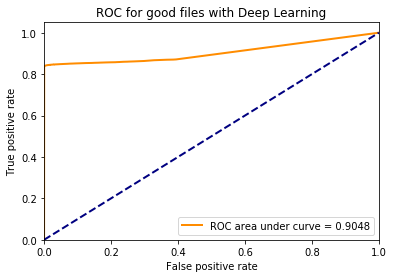

accuracy: 0.9935161593133968
precision: 0.9801805517367794
recall: 0.9756203247582558
f1: 0.9778951218397111


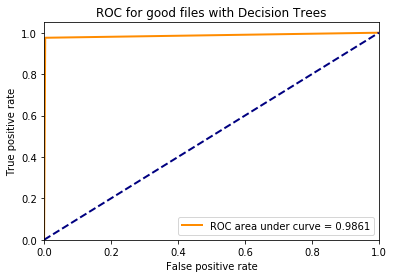

accuracy: 0.9955545125385544
precision: 0.9938217122683142
recall: 0.9758255792738552
f1: 0.9847414328784149


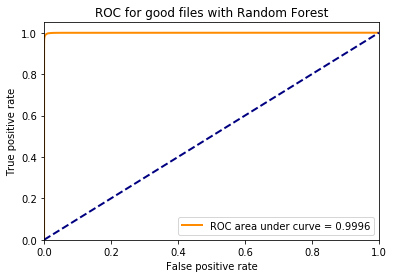

In [4]:
# evaluate ROC-AUC of algorithms for selected good files
summaries = []
good_files = [9, 8, 12]
for b in good_files:
    summaries += get_saved_data(0.15, binet_files[b])
    
feature, label = get_feature_labels(summaries)
plot_roc_curve('tf', feature, label, 'good files')
plot_roc_curve('dt', feature, label, 'good files')
plot_roc_curve('rf', feature, label, 'good files')


saved_data/saved_0.15s_10.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9387310322281853


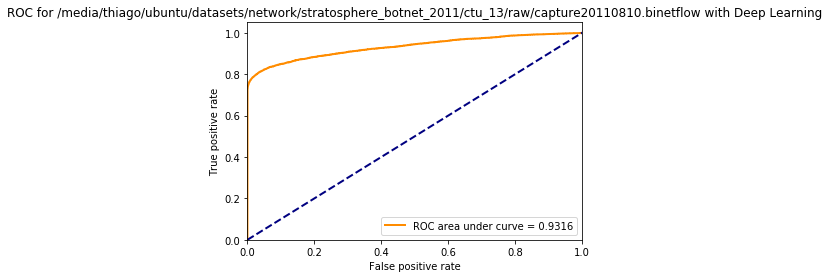

accuracy: 0.9862560274607023
precision: 0.9302494199535963
recall: 0.9239521820538672
f1: 0.9270901076667389


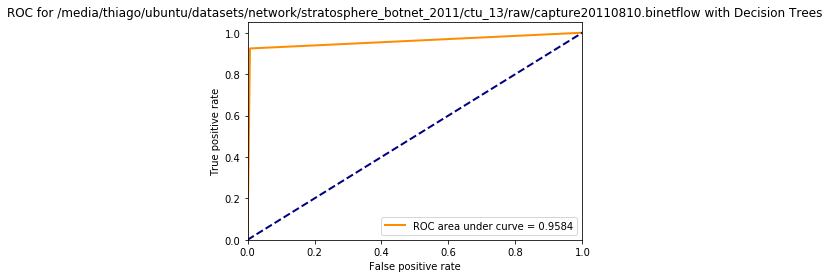

accuracy: 0.9899338000926254
precision: 0.9863593603010348
recall: 0.9060924672331845
f1: 0.9445236844080774


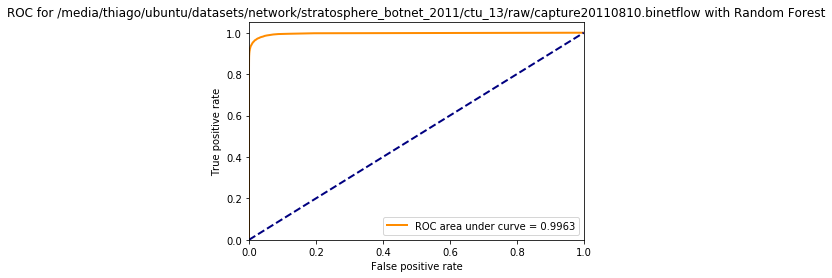

saved_data/saved_0.15s_11.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9317786848805722


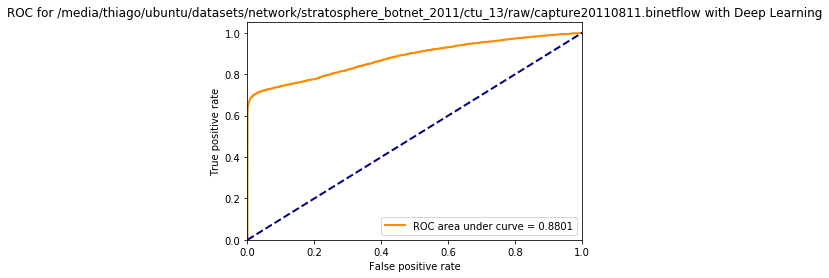

accuracy: 0.9854302226892454
precision: 0.9254823685961411
recall: 0.9155331285651601
f1: 0.920480864674093


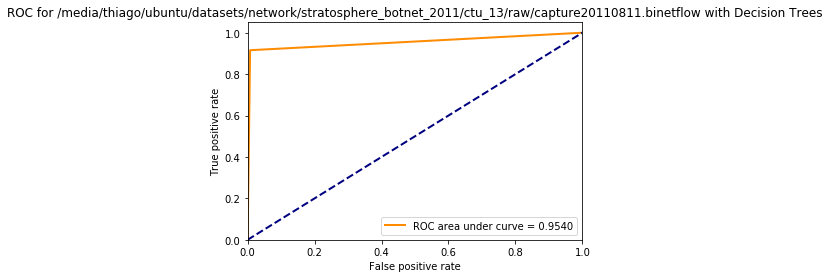

accuracy: 0.9877339045386574
precision: 0.9807739109272329
recall: 0.8841597191750767
f1: 0.9299642321449174


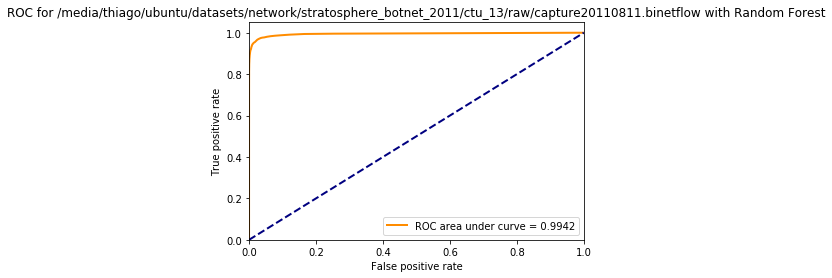

saved_data/saved_0.15s_12.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9915882006767691


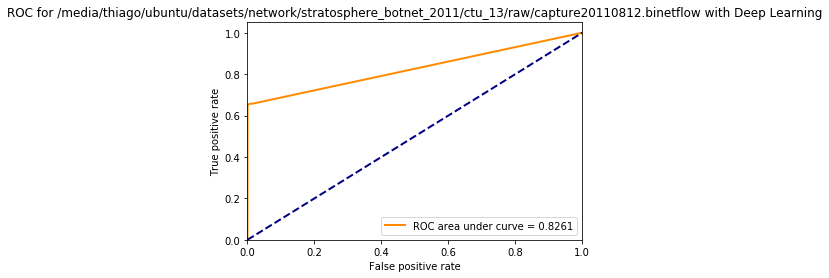

accuracy: 0.9983172723260262
precision: 0.9723395775209247
recall: 0.9555068149772834
f1: 0.9638497096124216


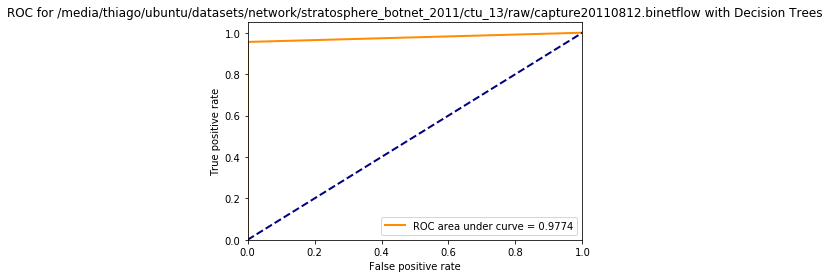

accuracy: 0.9986427835809916
precision: 0.9944097336402499
recall: 0.947516841610528
f1: 0.9703971119133574


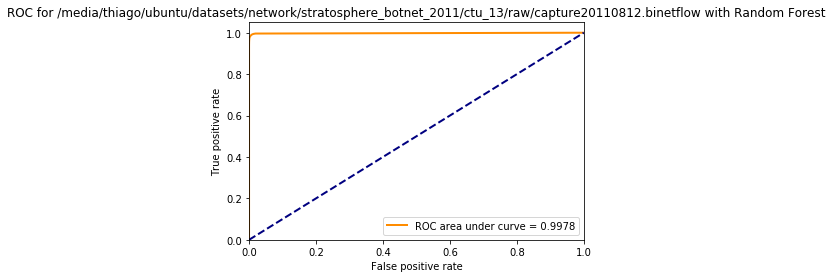

saved_data/saved_0.15s_15.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9844286144276111


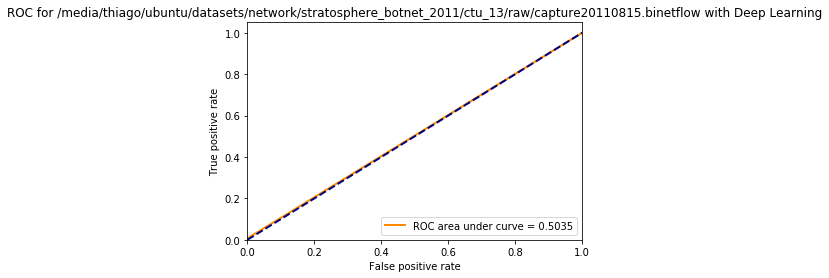

accuracy: 0.9903682151098625
precision: 0.7072829131652661
recall: 0.6507731958762887
f1: 0.6778523489932886


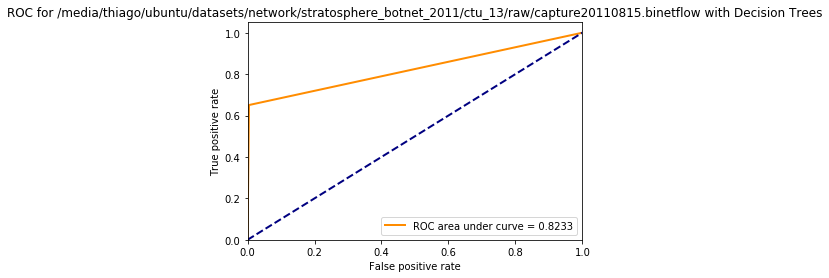

accuracy: 0.9914718571285241
precision: 0.9888579387186629
recall: 0.4574742268041237
f1: 0.6255506607929515


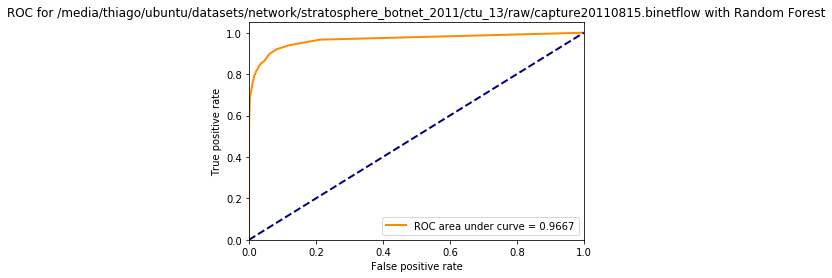

saved_data/saved_0.15s_15-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9330424567880516


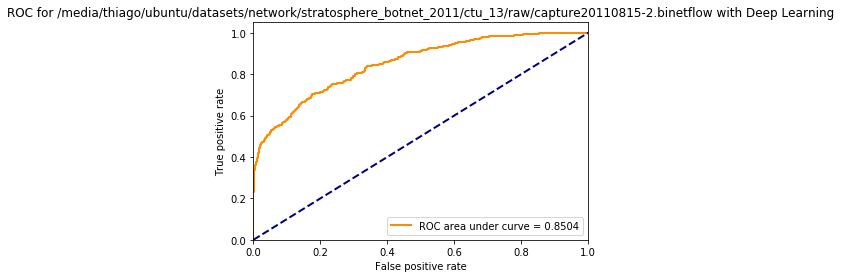

accuracy: 0.9607316663869777
precision: 0.7337110481586402
recall: 0.6491228070175439
f1: 0.6888297872340425


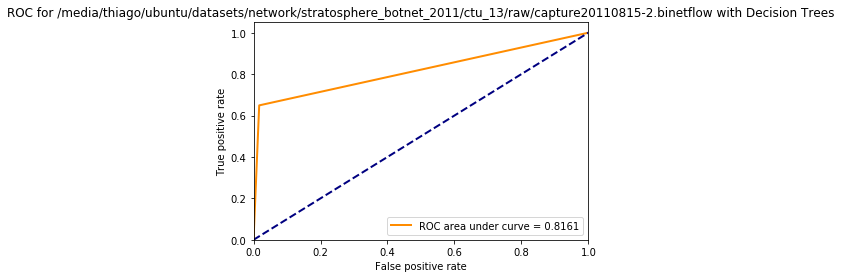

accuracy: 0.969961402919953
precision: 0.9824561403508771
recall: 0.5614035087719298
f1: 0.7145135566188198


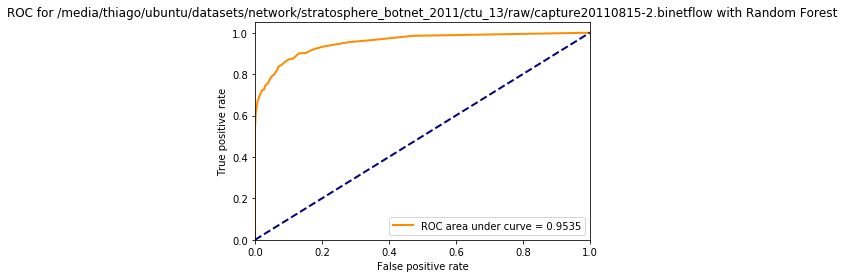

saved_data/saved_0.15s_16.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9871636435903351


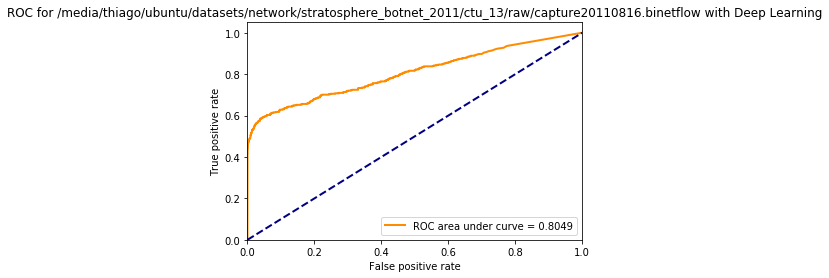

accuracy: 0.989515646800877
precision: 0.7518427518427518
recall: 0.6538461538461539
f1: 0.6994285714285715


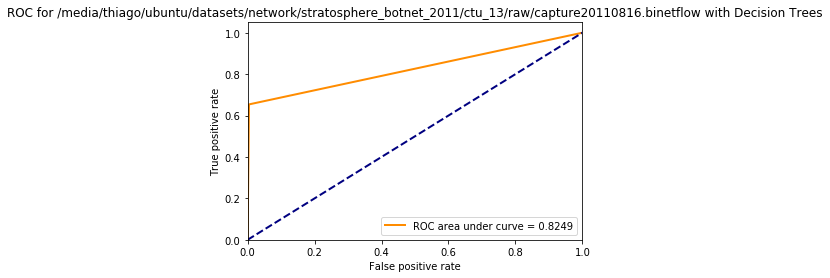

accuracy: 0.9918676499900339
precision: 0.9925373134328358
recall: 0.5683760683760684
f1: 0.7228260869565217


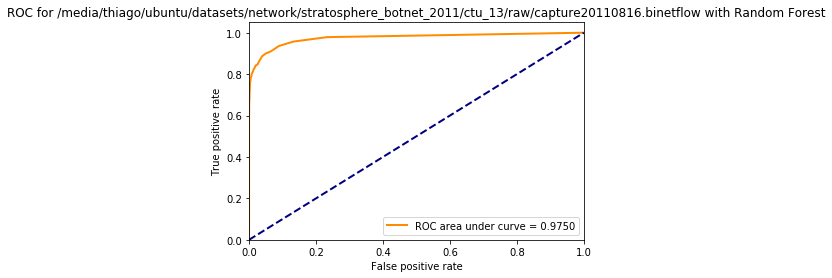

saved_data/saved_0.15s_16-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9968423609424338


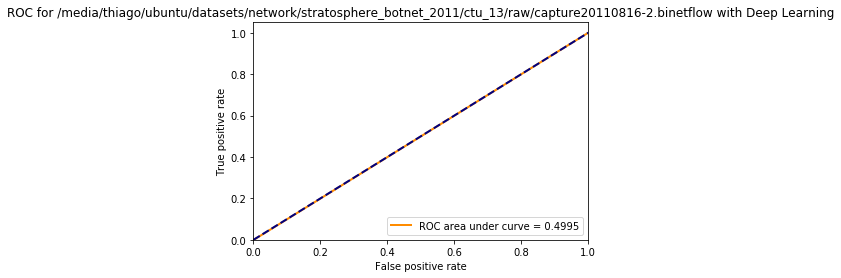

accuracy: 0.9912557687636628
precision: 0.0
recall: 0.0
f1: 0.0


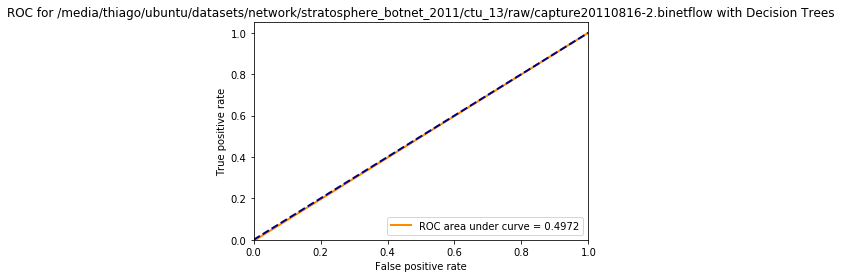

accuracy: 0.9968423609424338
precision: 0.0
recall: 0.0
f1: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


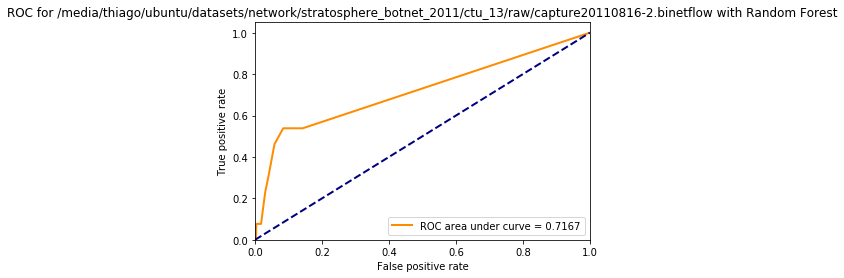

saved_data/saved_0.15s_16-3.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9932506518994924


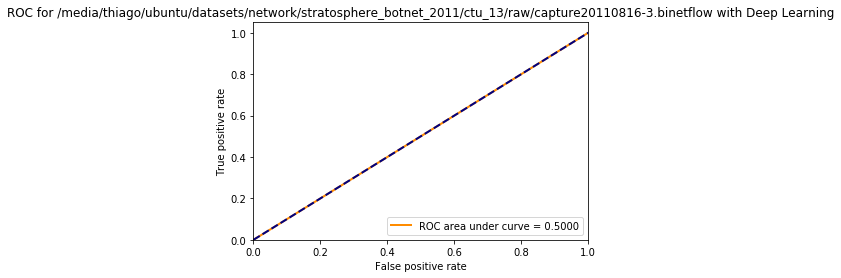

accuracy: 0.998244708787513
precision: 0.8944687045123726
recall: 0.8389078498293515
f1: 0.865797816132441


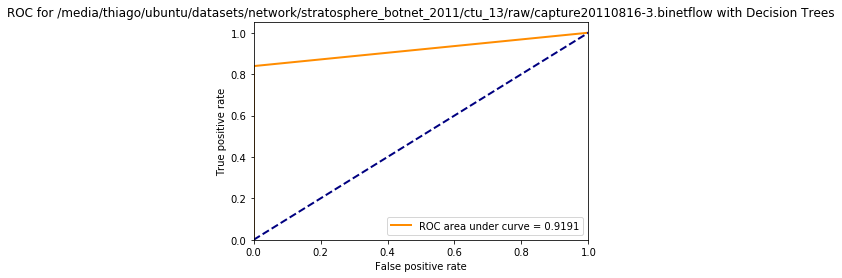

accuracy: 0.9984520266472555
precision: 0.9991158267020336
recall: 0.7713310580204779
f1: 0.8705701078582435


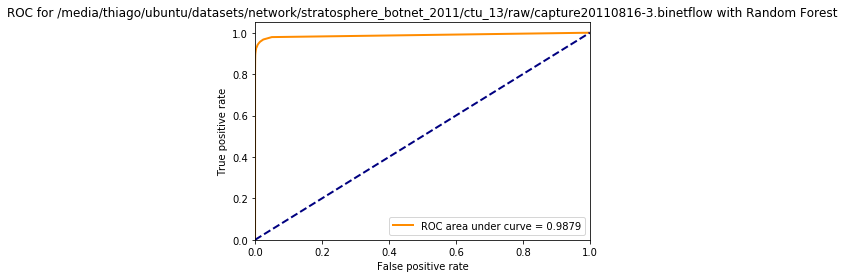

saved_data/saved_0.15s_17.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9649122806940795


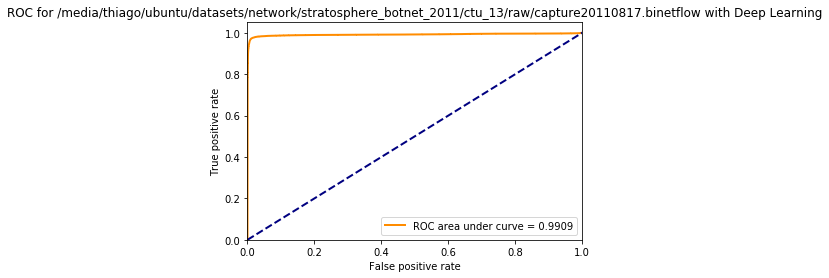

accuracy: 0.9747947851279575
precision: 0.9690011937922801
recall: 0.9686928156575703
f1: 0.9688469801862021


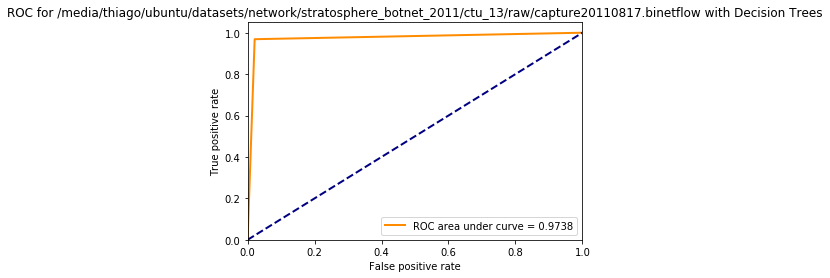

accuracy: 0.9809592789312731
precision: 0.9789658895509258
recall: 0.9738642692338293
f1: 0.9764084155947752


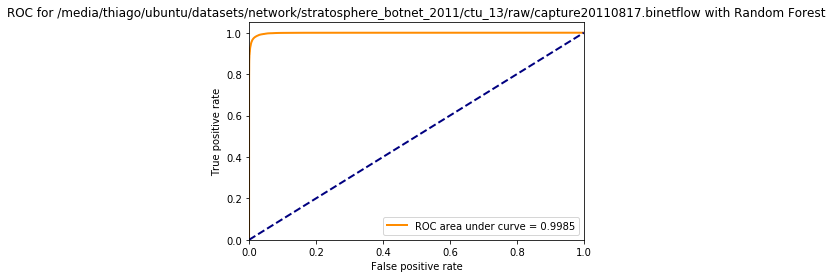

saved_data/saved_0.15s_18.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9885644234661545


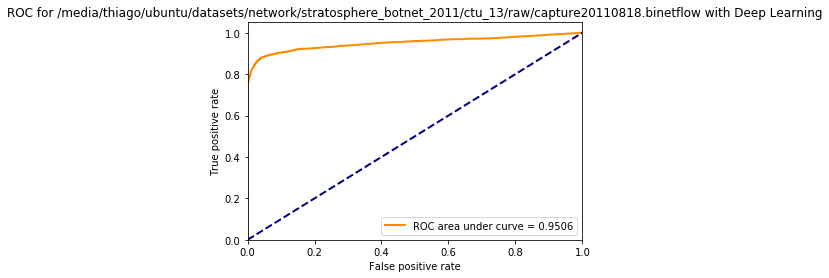

accuracy: 0.9906685695466022
precision: 0.90869140625
recall: 0.8521062271062271
f1: 0.8794896030245746


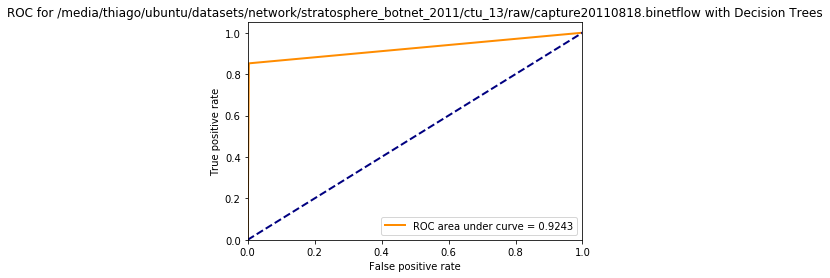

accuracy: 0.9924799648699089
precision: 0.9733048585157501
recall: 0.8347069597069597
f1: 0.8986936159723934


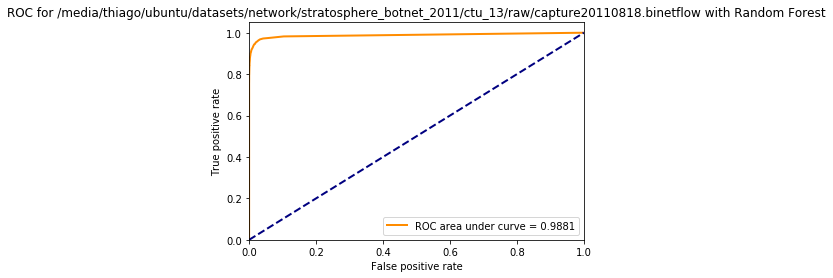

saved_data/saved_0.15s_18-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9767676765268499


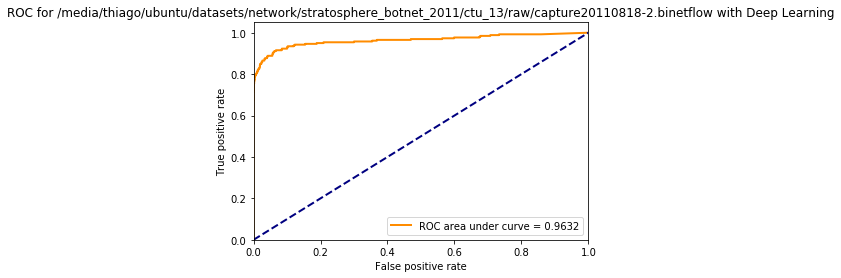

accuracy: 0.969023569023569
precision: 0.8333333333333334
recall: 0.8076923076923077
f1: 0.8203125000000001


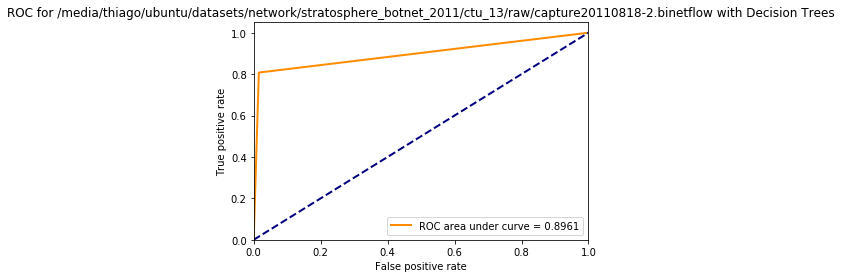

accuracy: 0.9808080808080808
precision: 0.9393939393939394
recall: 0.8346153846153846
f1: 0.8839103869653768


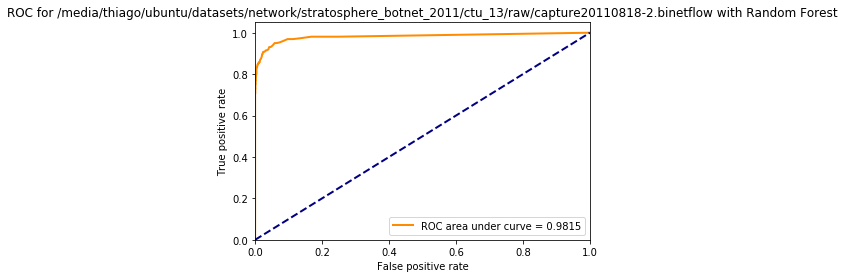

saved_data/saved_0.15s_19.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9665177036823379


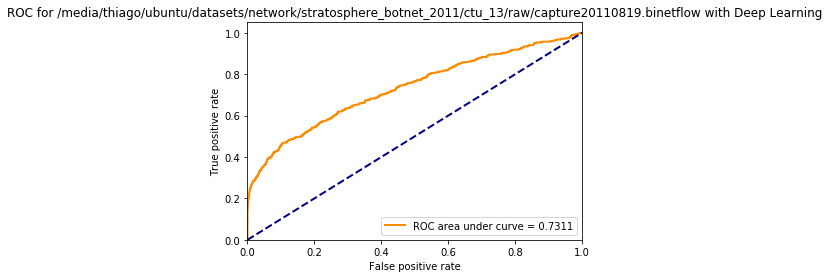

accuracy: 0.9865245788930904
precision: 0.8102345415778252
recall: 0.7802874743326489
f1: 0.7949790794979079


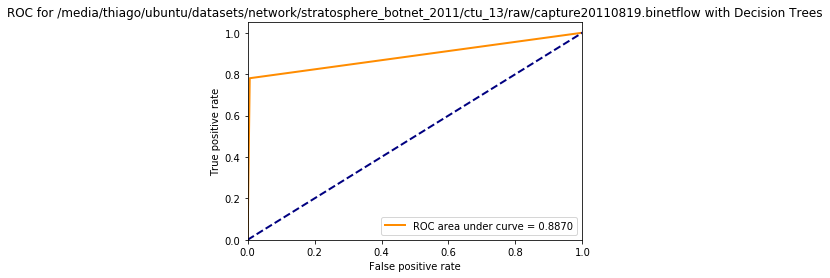

accuracy: 0.9827432107253352
precision: 0.9796747967479674
recall: 0.4948665297741273
f1: 0.6575716234652115


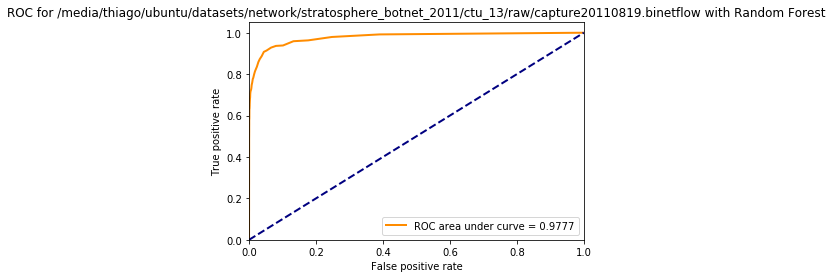

saved_data/saved_0.15s_15-3.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.980148432205491


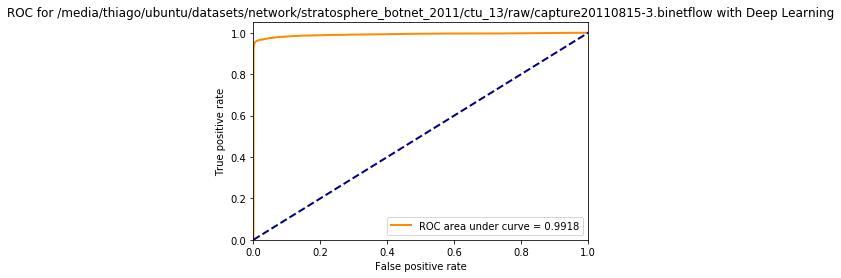

accuracy: 0.9977630484250428
precision: 0.9895526868808165
recall: 0.9861185903189135
f1: 0.9878326540397987


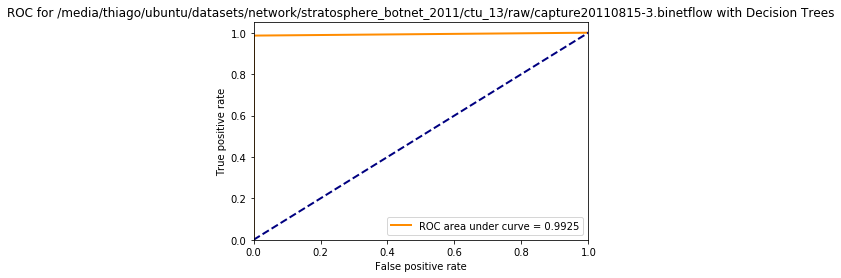

accuracy: 0.9983360606511402
precision: 0.9973331717073762
recall: 0.984562915096033
f1: 0.9909069011200771


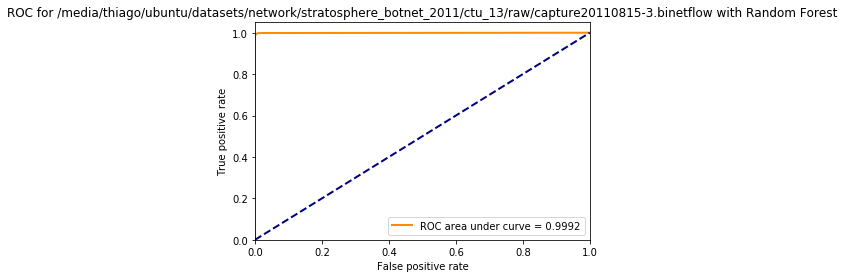

In [5]:
# evaluate ROC-AUC of algorithms for each scenario aggredate by 0.15s, with 50% for testing
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(0.15, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)    


saved_data/saved_0.15s_10.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9627460328270789


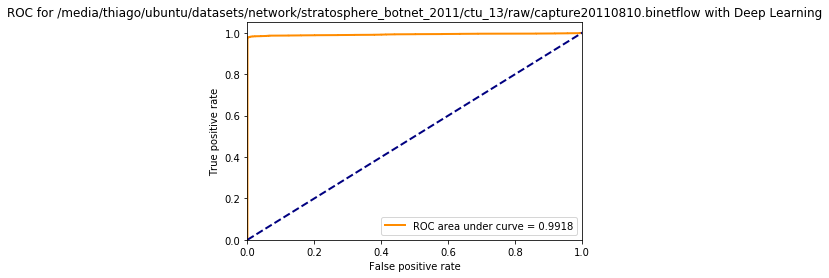

accuracy: 0.9889895343821653
precision: 0.9443907156673114
recall: 0.9387166546503244
f1: 0.9415451367964324


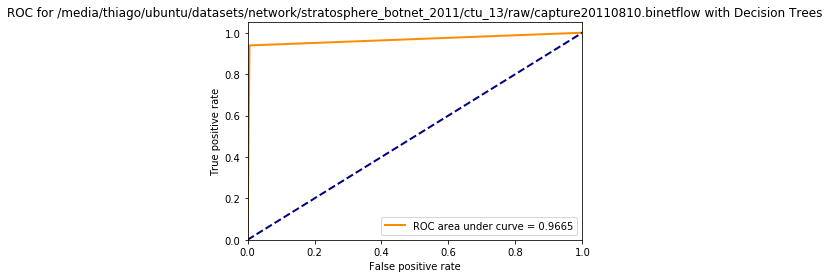

accuracy: 0.9909646075960862
precision: 0.9885743962607115
recall: 0.9149242970439798
f1: 0.9503245132301548


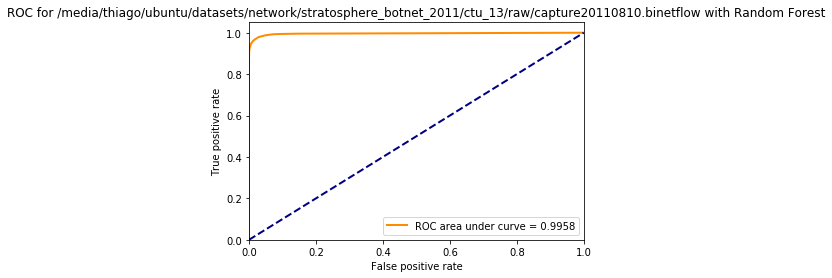

saved_data/saved_0.15s_11.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.961942610804257


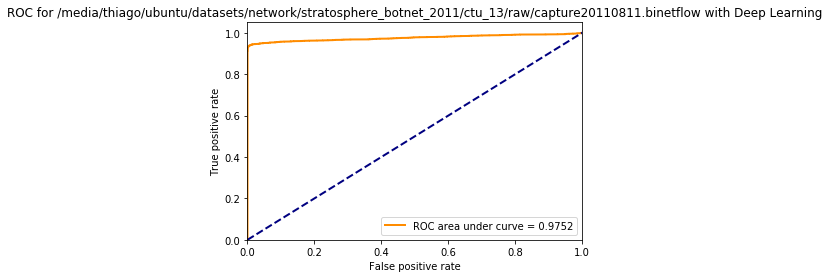

accuracy: 0.9902330594099421
precision: 0.9508862629246676
recall: 0.9425329428989752
f1: 0.9466911764705883


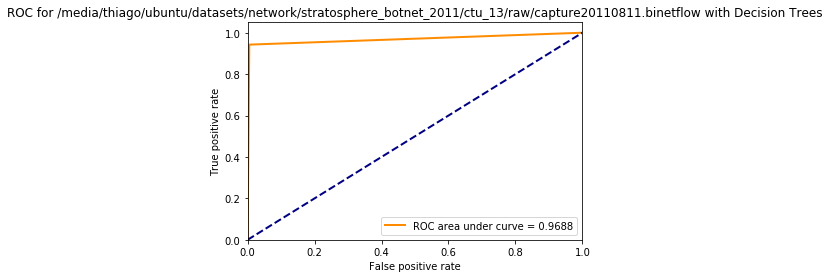

accuracy: 0.9907719250976694
precision: 0.9873116574147502
recall: 0.9114202049780381
f1: 0.9478492577084127


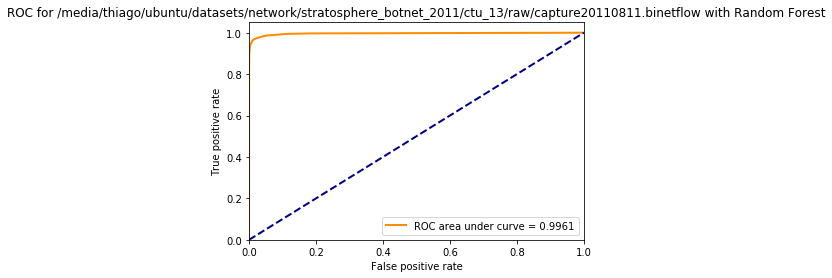

saved_data/saved_0.15s_12.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9918070472267176


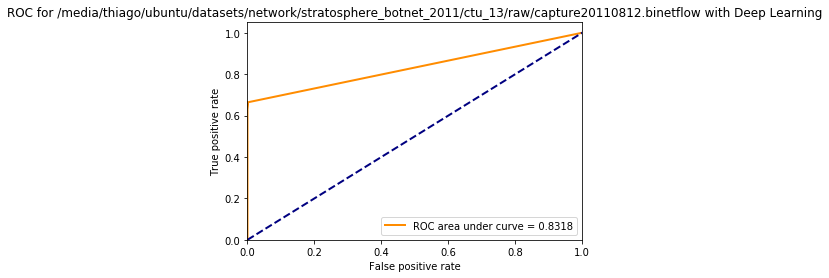

accuracy: 0.9984674611348143
precision: 0.972013201320132
recall: 0.9623578617174225
f1: 0.967161434388546


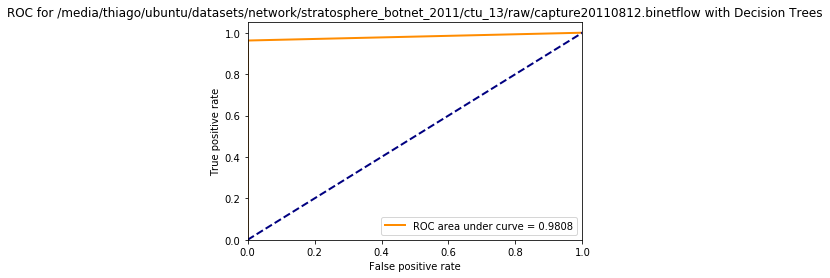

accuracy: 0.9989210926389093
precision: 0.9948474576271187
recall: 0.9589596131224677
f1: 0.9765739385065886


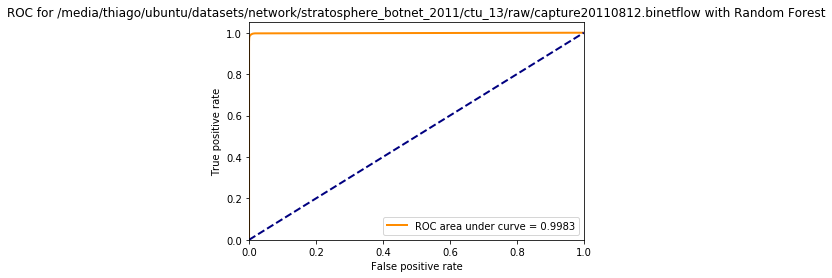

saved_data/saved_0.15s_15.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9844821243436674


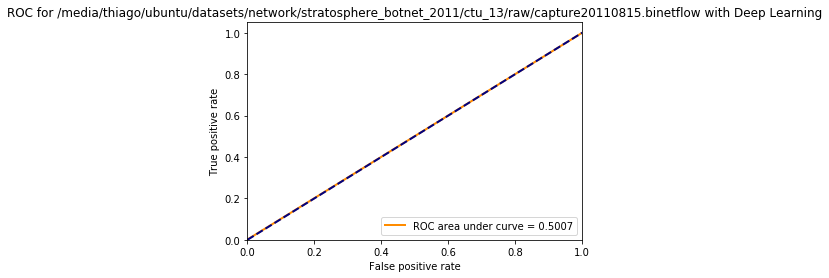

accuracy: 0.9910036453630313
precision: 0.7283372365339579
recall: 0.6702586206896551
f1: 0.6980920314253647


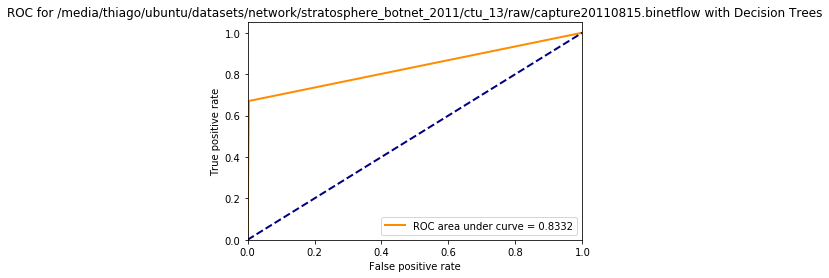

accuracy: 0.9936456974683121
precision: 0.9963768115942029
recall: 0.5926724137931034
f1: 0.7432432432432432


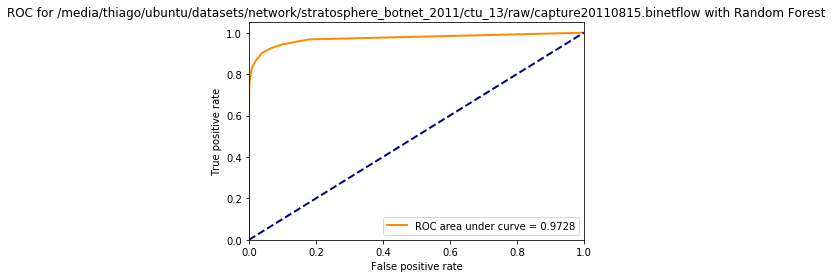

saved_data/saved_0.15s_15-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.94574944058254


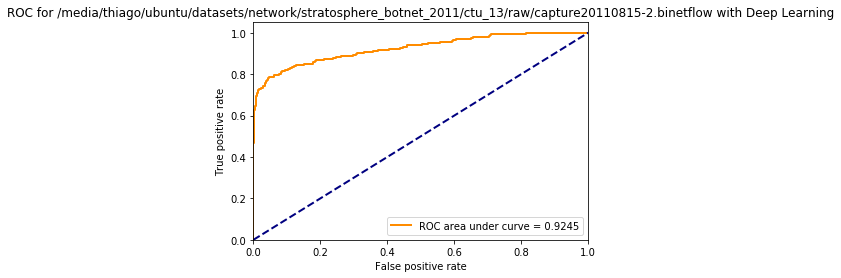

accuracy: 0.956096196868009
precision: 0.6859504132231405
recall: 0.6720647773279352
f1: 0.6789366053169734


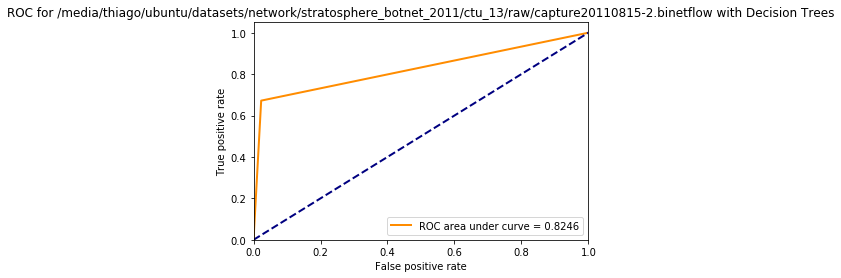

accuracy: 0.9697986577181208
precision: 0.9793103448275862
recall: 0.5748987854251012
f1: 0.7244897959183674


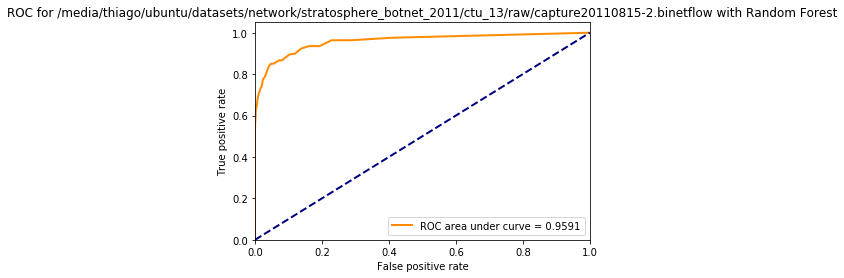

saved_data/saved_0.15s_16.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9898345624875423


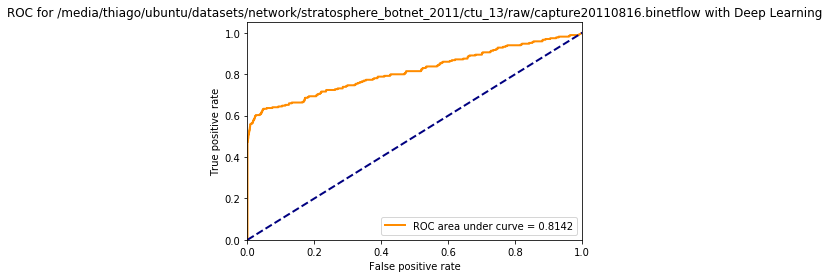

accuracy: 0.9899010032555976
precision: 0.7204724409448819
recall: 0.6931818181818182
f1: 0.7065637065637066


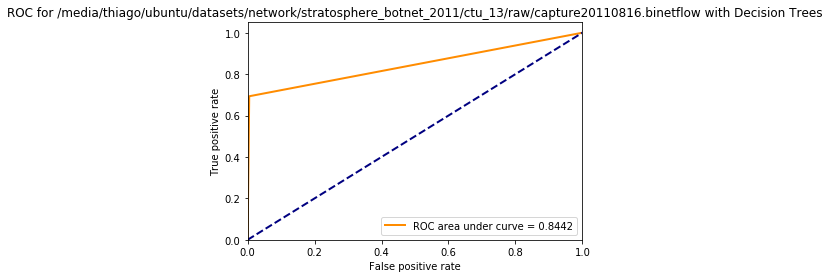

accuracy: 0.9929572785861405
precision: 0.99375
recall: 0.6022727272727273
f1: 0.7499999999999999


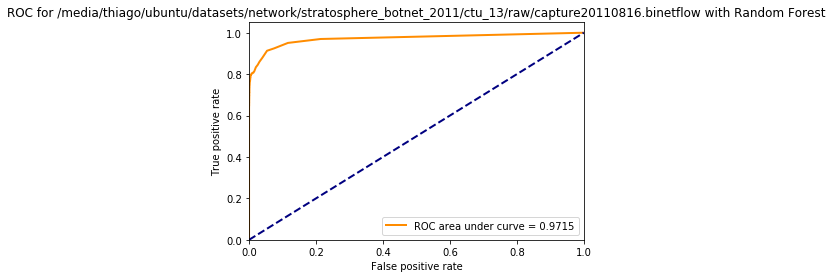

saved_data/saved_0.15s_16-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9967611336032388


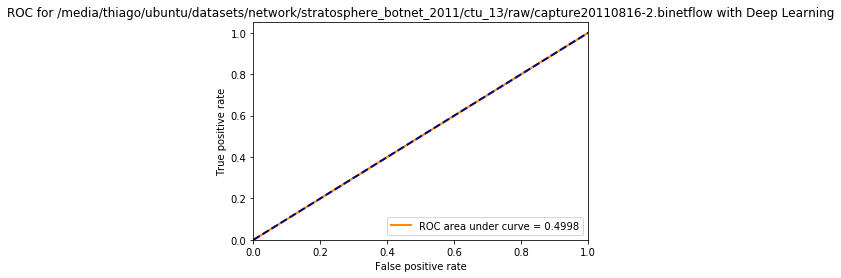

accuracy: 0.9951417004048583
precision: 0.0
recall: 0.0
f1: 0.0


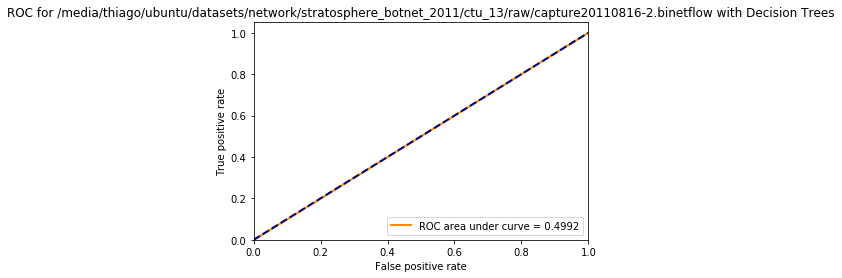

accuracy: 0.9967611336032388
precision: 0.0
recall: 0.0
f1: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


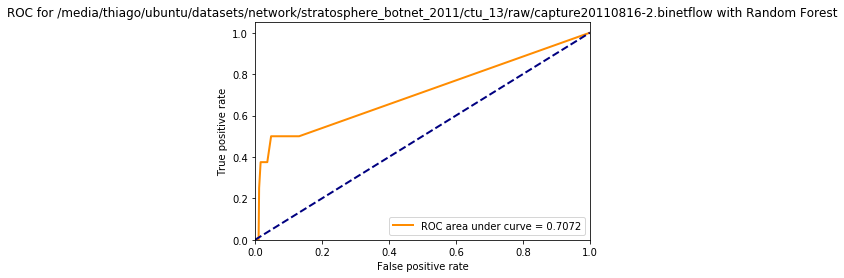

saved_data/saved_0.15s_16-3.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9932736975467424


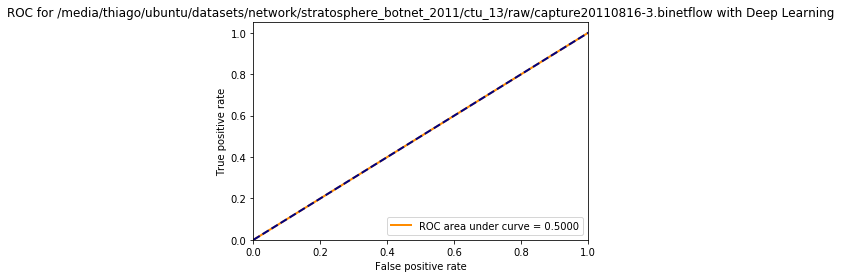

accuracy: 0.9984950282182209
precision: 0.9028436018957346
recall: 0.8698630136986302
f1: 0.8860465116279072


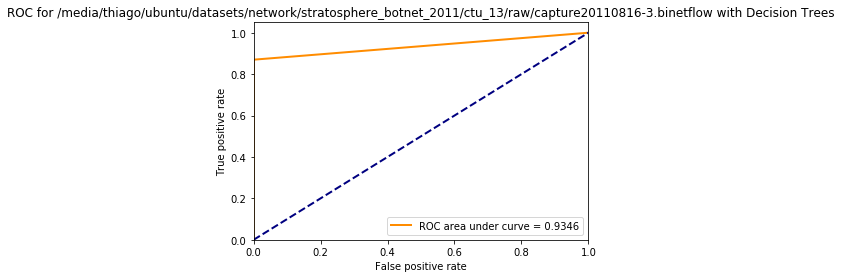

accuracy: 0.9988175221714592
precision: 0.9986187845303868
recall: 0.8253424657534246
f1: 0.90375


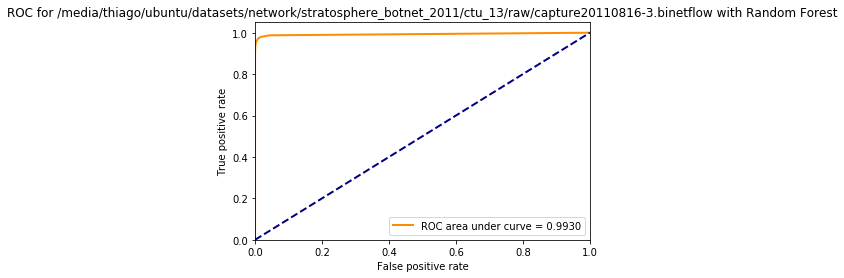

saved_data/saved_0.15s_17.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9717259509630345


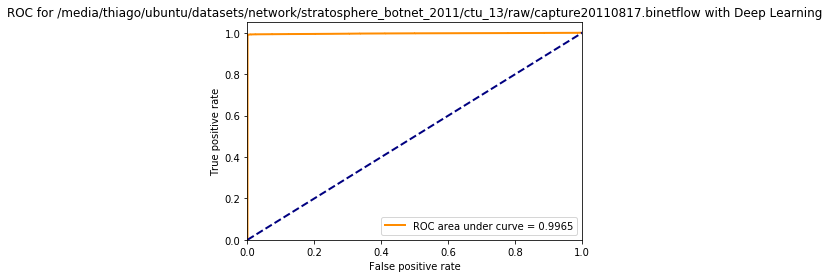

accuracy: 0.9783518429100274
precision: 0.9736824527419679
recall: 0.9724482988659106
f1: 0.9730649844798238


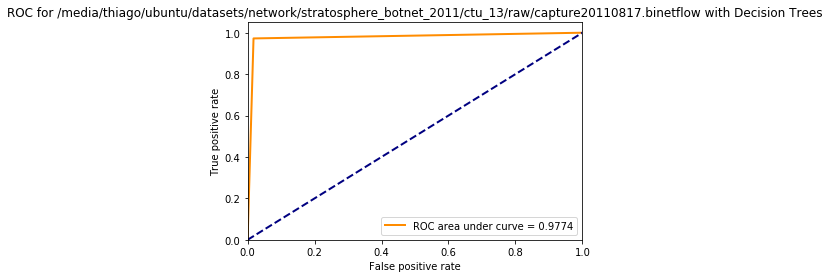

accuracy: 0.9828853479263909
precision: 0.9821932535949469
recall: 0.9751167444963309
f1: 0.9786422067487949


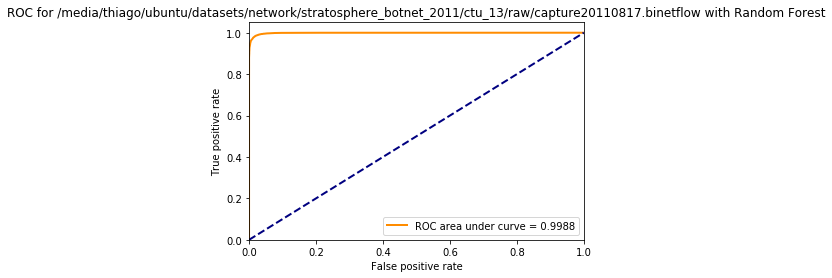

saved_data/saved_0.15s_18.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.987771780562925


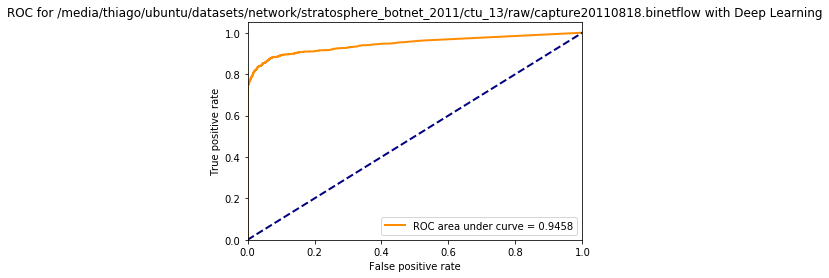

accuracy: 0.9918580184795536
precision: 0.9192339716902581
recall: 0.8665620094191523
f1: 0.8921212121212122


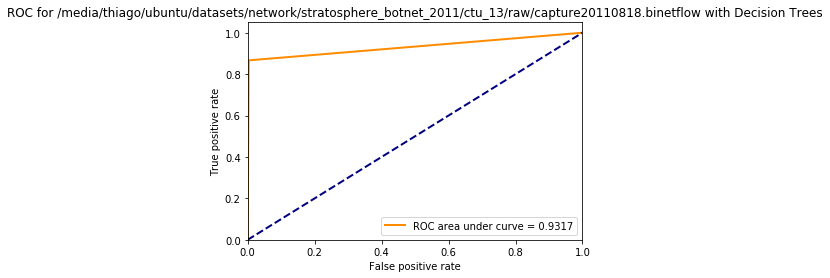

accuracy: 0.9928948251151161
precision: 0.9643175735950045
recall: 0.8485086342229199
f1: 0.9027139874739039


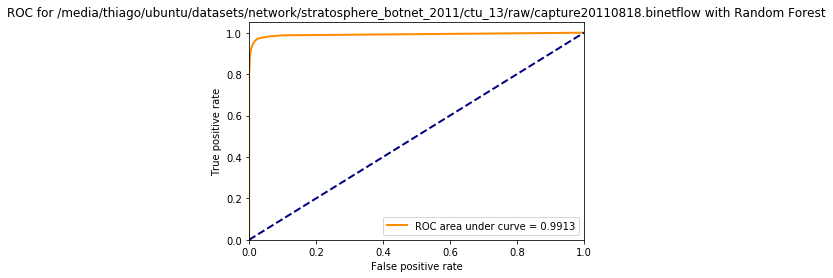

saved_data/saved_0.15s_18-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9781144781144782


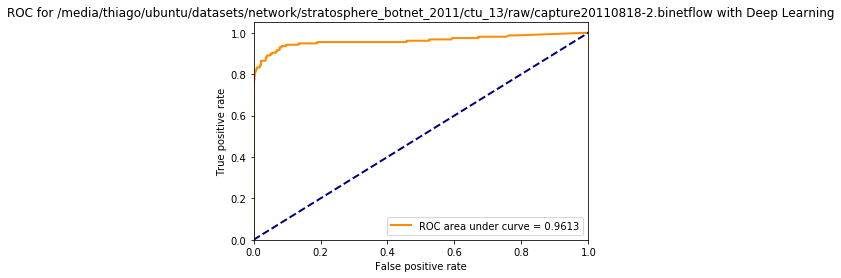

accuracy: 0.9652076318742986
precision: 0.7961783439490446
recall: 0.8064516129032258
f1: 0.8012820512820513


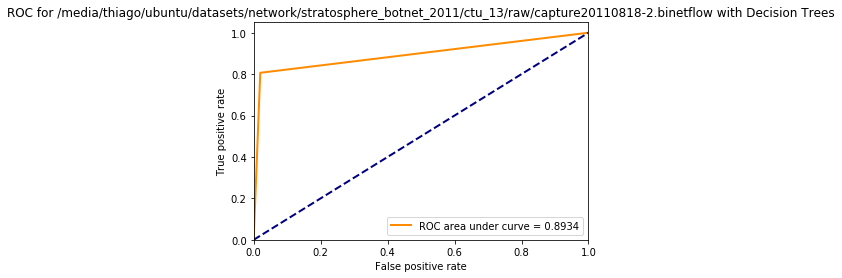

accuracy: 0.9769921436588104
precision: 0.9523809523809523
recall: 0.7741935483870968
f1: 0.8540925266903914


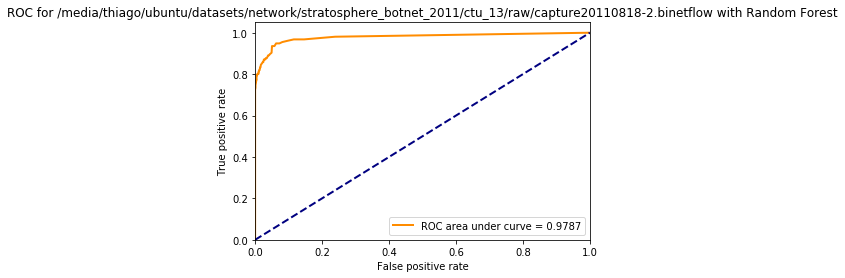

saved_data/saved_0.15s_19.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9667697948894236


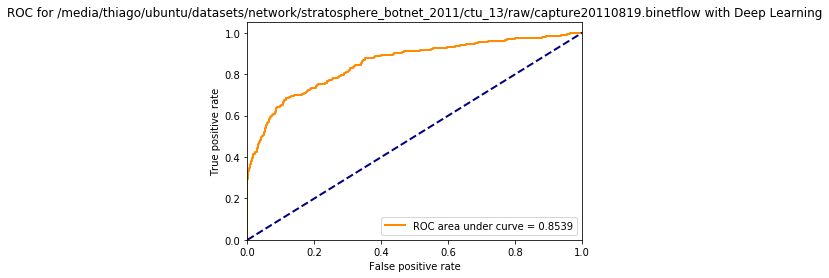

accuracy: 0.9859058095565486
precision: 0.8174904942965779
recall: 0.7413793103448276
f1: 0.7775768535262207


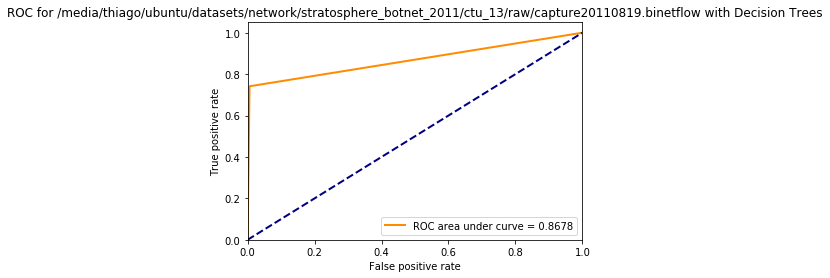

accuracy: 0.9878537870975135
precision: 0.9842105263157894
recall: 0.6448275862068965
f1: 0.7791666666666667


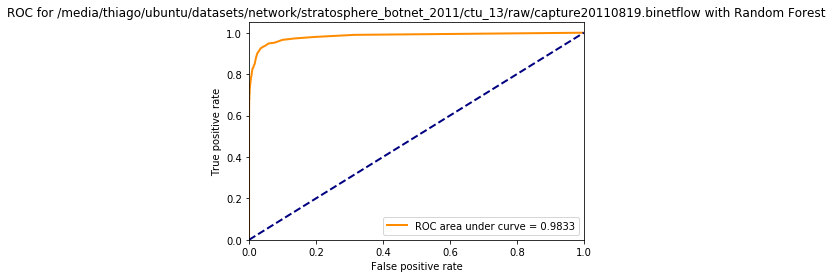

saved_data/saved_0.15s_15-3.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9823688222005914


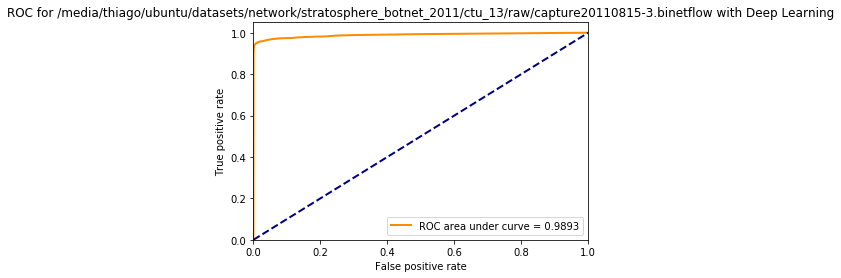

accuracy: 0.9983287112710977
precision: 0.9934515414064075
recall: 0.9882742032471438
f1: 0.9908561093247589


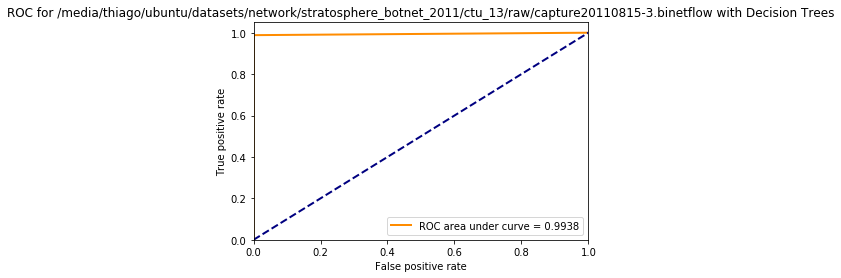

accuracy: 0.9985950155191097
precision: 0.9972669298511995
recall: 0.9873722188815394
f1: 0.9922949085964647


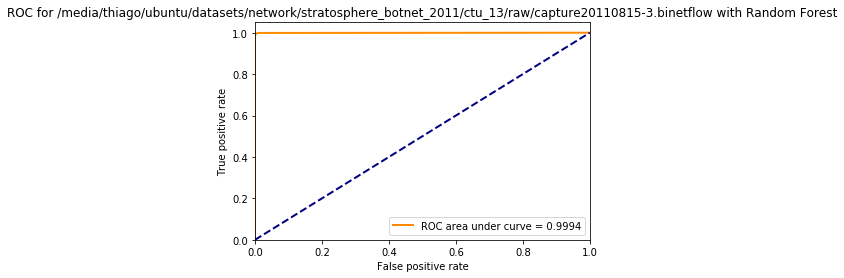

In [6]:
# evaluate ROC-AUC of algorithms for each scenario aggredate by 0.15s, with 30% for testing
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(0.15, binet))
    plot_roc_curve('tf', feature, label, binet, .3)
    plot_roc_curve('dt', feature, label, binet, .3)
    plot_roc_curve('rf', feature, label, binet, .3)


saved_data/saved_0.25s_10.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.8771224916116598


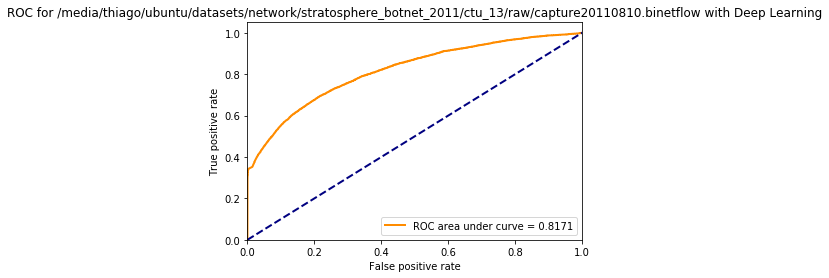

accuracy: 0.9561427403977117
precision: 0.859359686377001
recall: 0.8308591282375237
f1: 0.8448691183555485


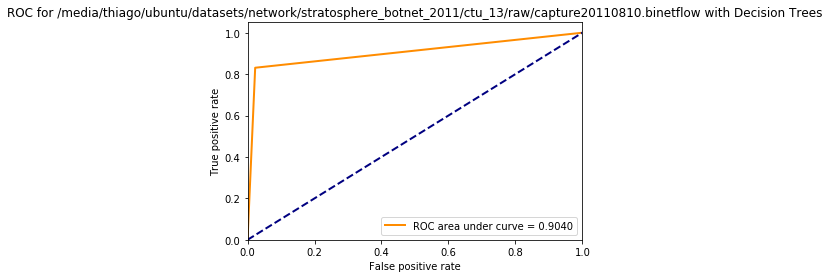

accuracy: 0.9644511032416235
precision: 0.9814141414141414
recall: 0.7672141503474416
f1: 0.8611948236128345


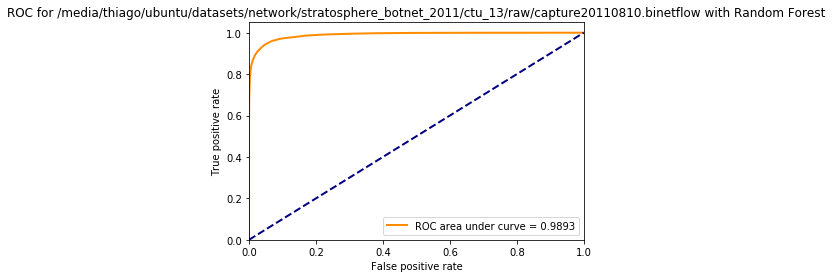

saved_data/saved_0.25s_11.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.8708504477772807


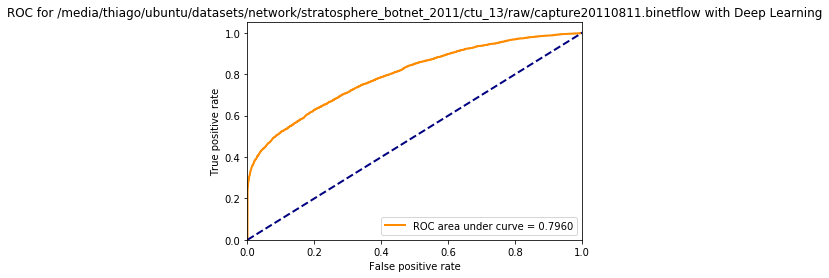

accuracy: 0.9474782842906202
precision: 0.7942900841192965
recall: 0.8053760661669682
f1: 0.7997946611909651


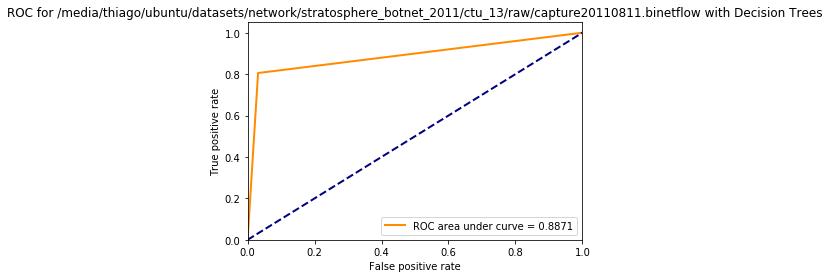

accuracy: 0.9668372500168338
precision: 0.9784339747843398
recall: 0.7622124579994831
f1: 0.8568937963097487


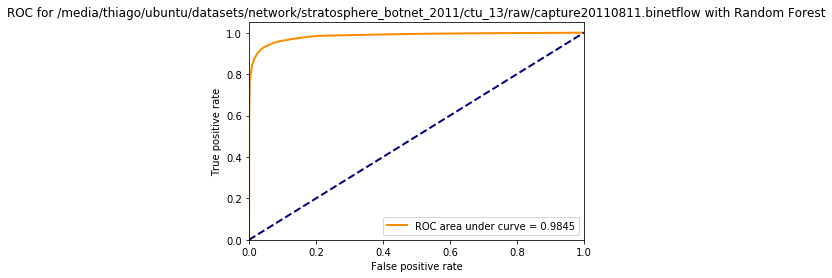

saved_data/saved_0.25s_12.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9966247377329995


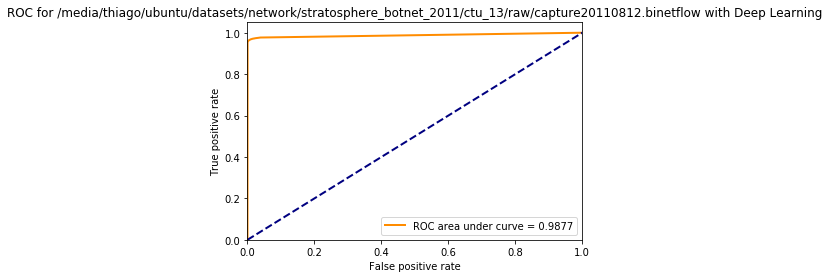

accuracy: 0.9968401260908787
precision: 0.9535555188912721
recall: 0.9441313403577555
f1: 0.9488200287297353


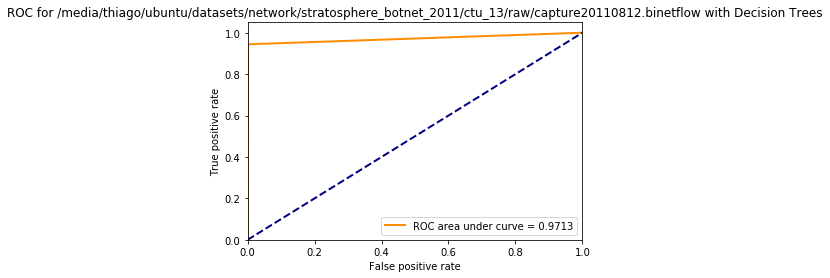

accuracy: 0.9976915435996716
precision: 0.9902232220107285
recall: 0.934819897084048
f1: 0.9617242972984329


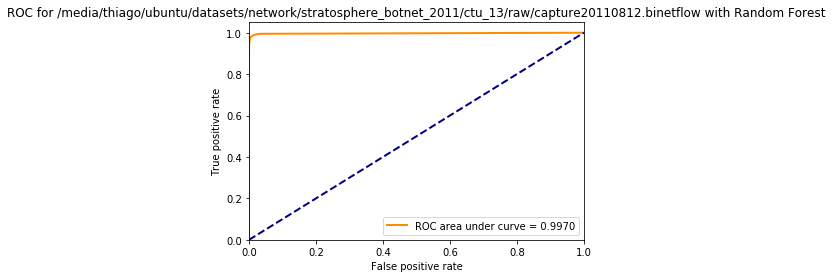

saved_data/saved_0.25s_15.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9757062146892655


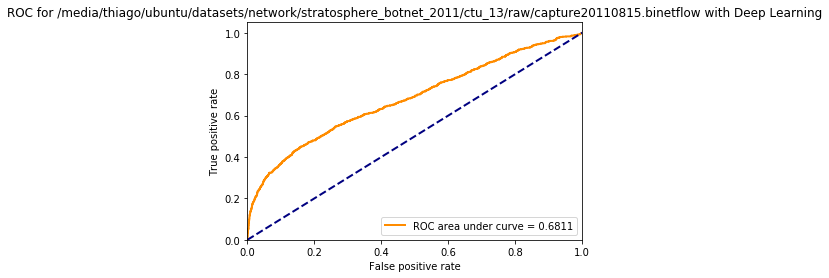

accuracy: 0.9734463276836158
precision: 0.45417789757412397
recall: 0.46101231190150477
f1: 0.4575695858791581


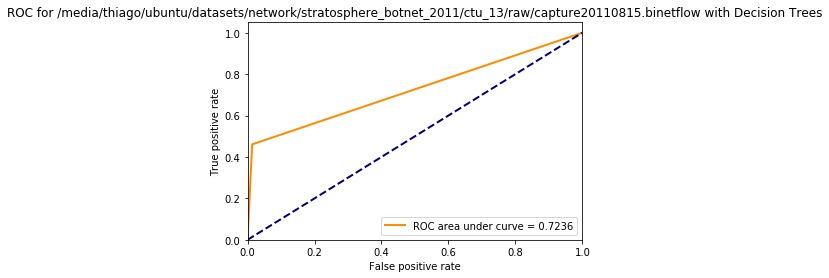

accuracy: 0.980325689597873
precision: 0.954248366013072
recall: 0.1997264021887825
f1: 0.33031674208144796


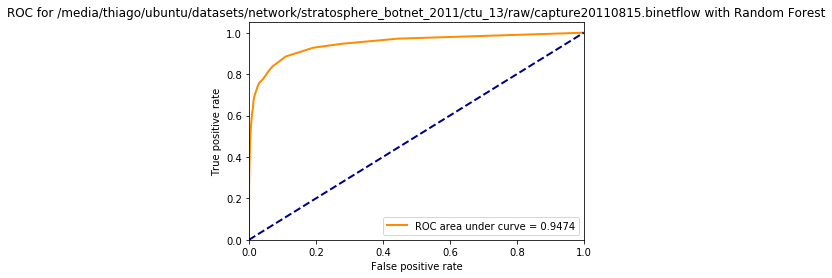

saved_data/saved_0.25s_15-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.8960244648318043


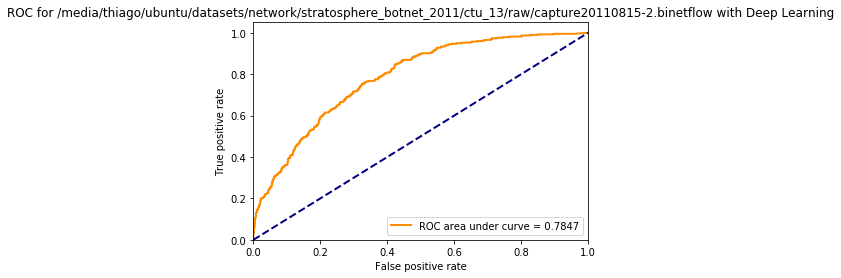

accuracy: 0.8754517653600222
precision: 0.3972222222222222
recall: 0.38235294117647056
f1: 0.38964577656675753


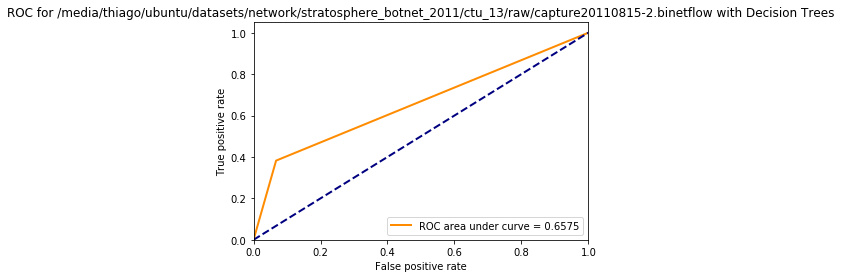

accuracy: 0.9054767862107311
precision: 0.8541666666666666
recall: 0.10962566844919786
f1: 0.19431279620853079


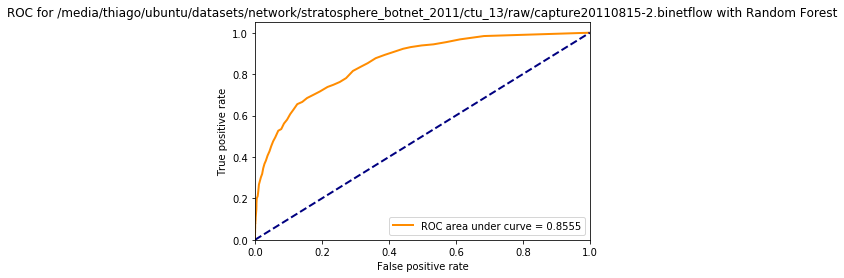

saved_data/saved_0.25s_16.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.978631073706358


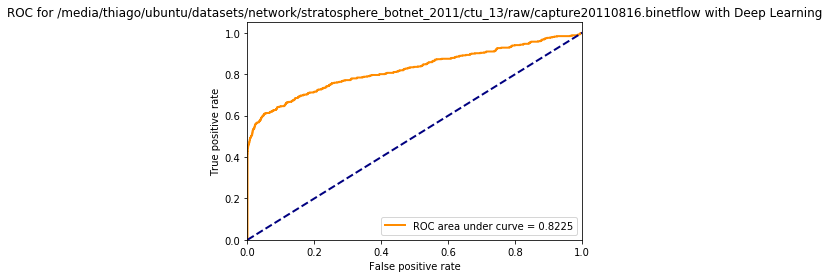

accuracy: 0.9715300151226247
precision: 0.5643564356435643
recall: 0.47010309278350515
f1: 0.5129358830146231


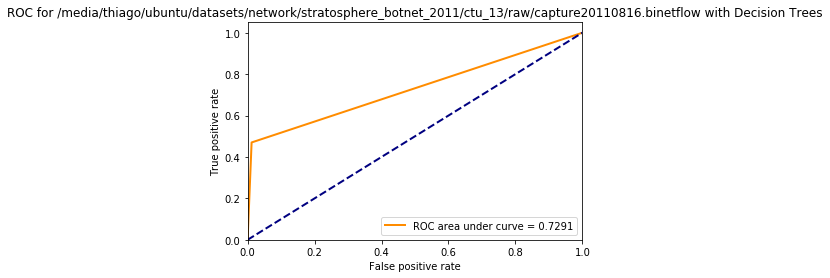

accuracy: 0.9823788546255506
precision: 1.0
recall: 0.44742268041237115
f1: 0.6182336182336183


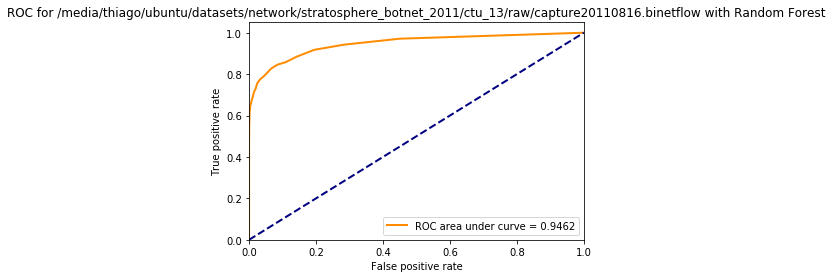

saved_data/saved_0.25s_16-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9943480016148567


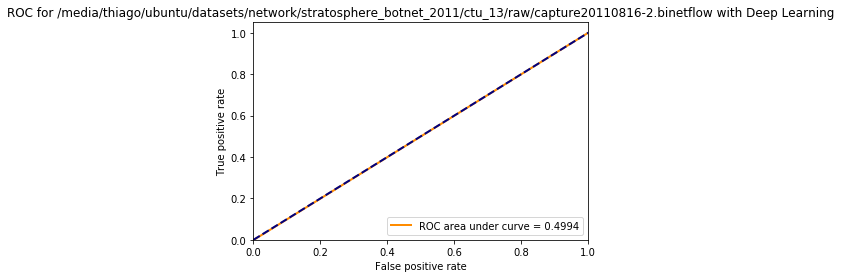

accuracy: 0.9890997174000807
precision: 0.0
recall: 0.0
f1: 0.0


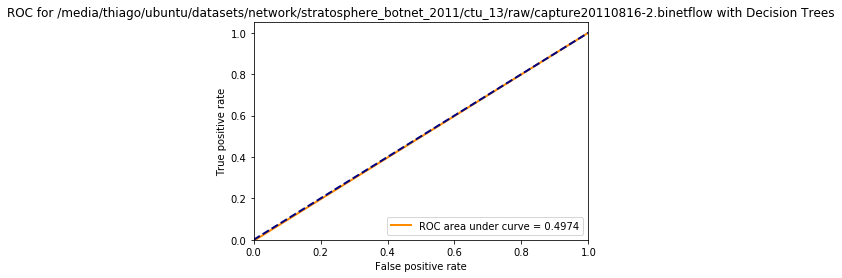

accuracy: 0.9943480016148567
precision: 0.0
recall: 0.0
f1: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


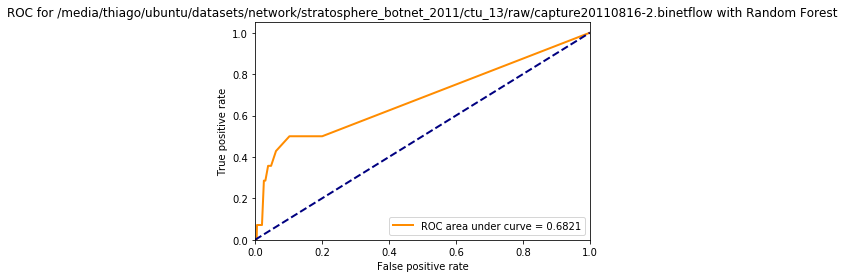

saved_data/saved_0.25s_16-3.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9896919198890011


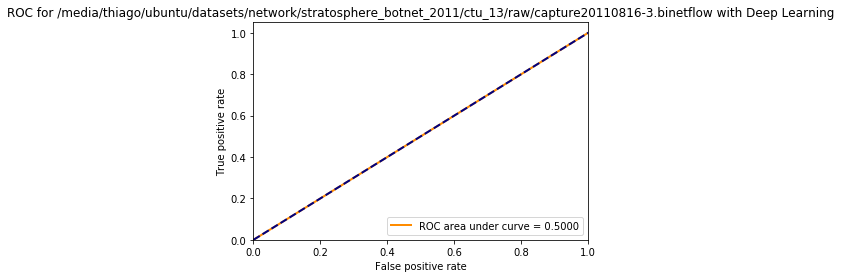

accuracy: 0.9957648973187369
precision: 0.8181126331811264
recall: 0.7575757575757576
f1: 0.7866813025978778


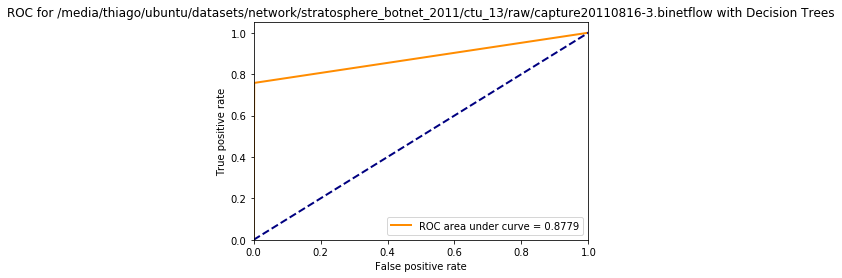

accuracy: 0.996258871559433
precision: 0.9967032967032967
recall: 0.6391825229034531
f1: 0.7788750536711034


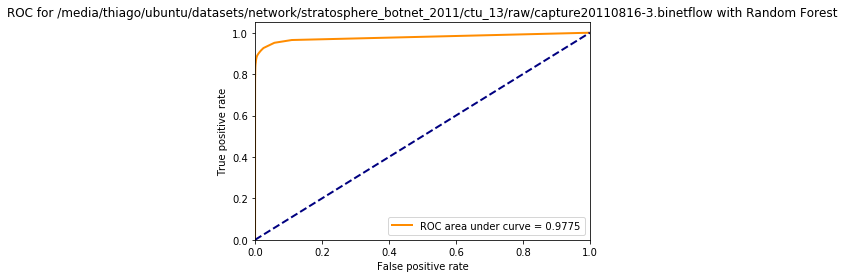

saved_data/saved_0.25s_17.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9009999195902967


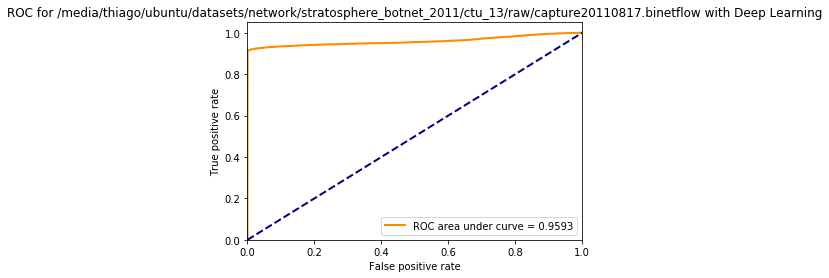

accuracy: 0.9454199394150604
precision: 0.9415501905972046
recall: 0.9356623173591486
f1: 0.9385970203269196


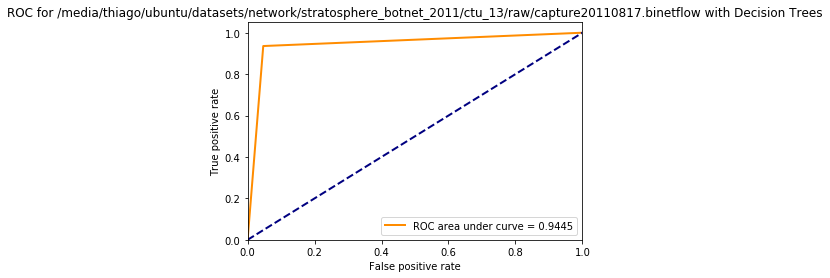

accuracy: 0.9671340106693832
precision: 0.9695214873514173
recall: 0.9563465816848055
f1: 0.9628889696089115


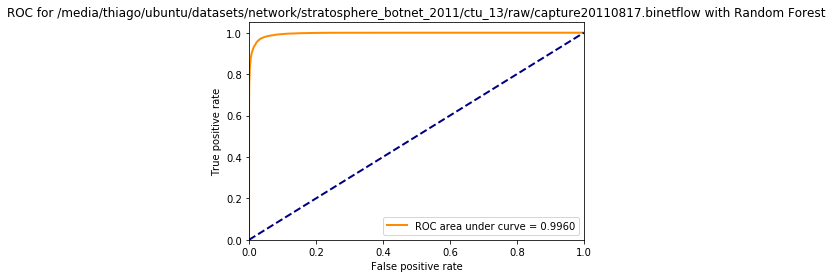

saved_data/saved_0.25s_18.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9877422262280307


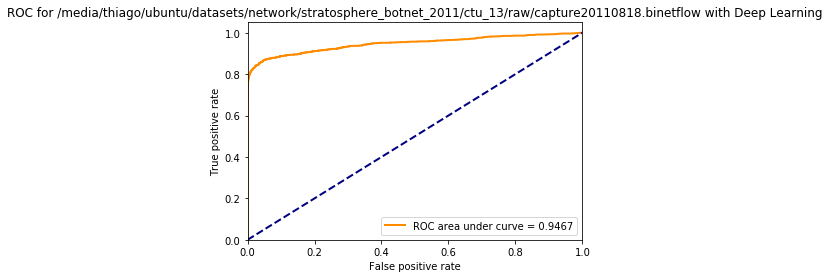

accuracy: 0.983746432326874
precision: 0.8104015799868335
recall: 0.8295148247978437
f1: 0.8198468198468198


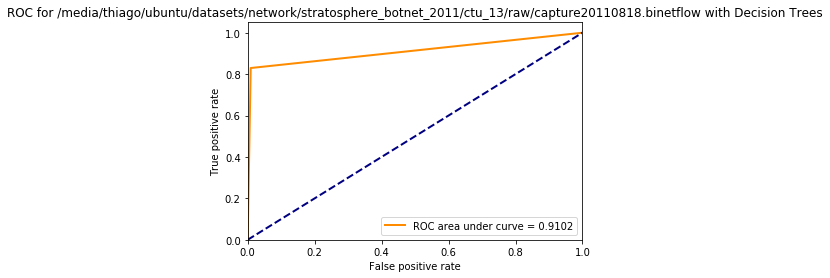

accuracy: 0.9905062340393571
precision: 0.9513137557959814
recall: 0.8295148247978437
f1: 0.8862491000719942


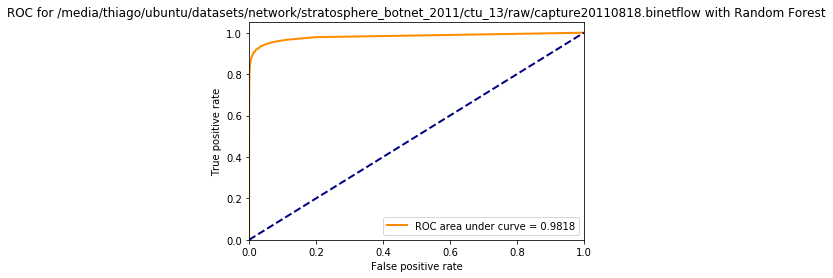

saved_data/saved_0.25s_18-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9736399326977005


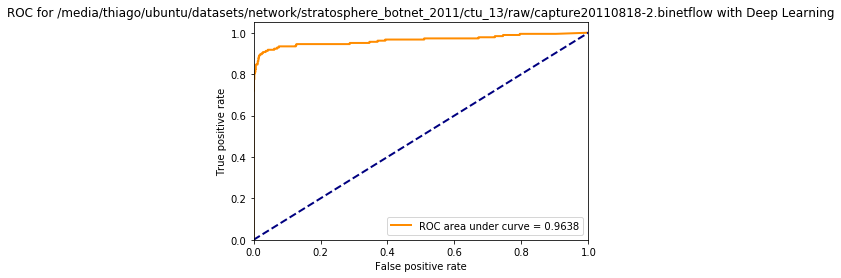

accuracy: 0.9624228827818284
precision: 0.8074866310160428
recall: 0.8296703296703297
f1: 0.8184281842818428


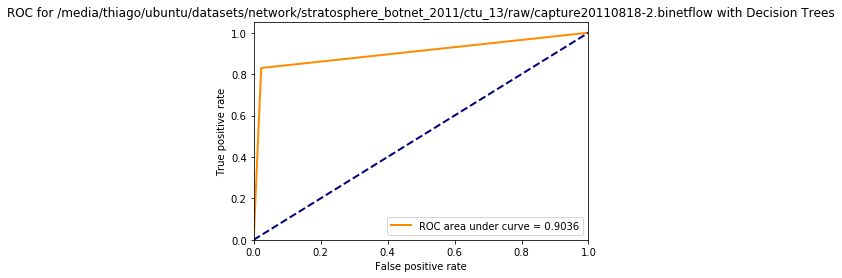

accuracy: 0.9775659001682557
precision: 0.94375
recall: 0.8296703296703297
f1: 0.8830409356725146


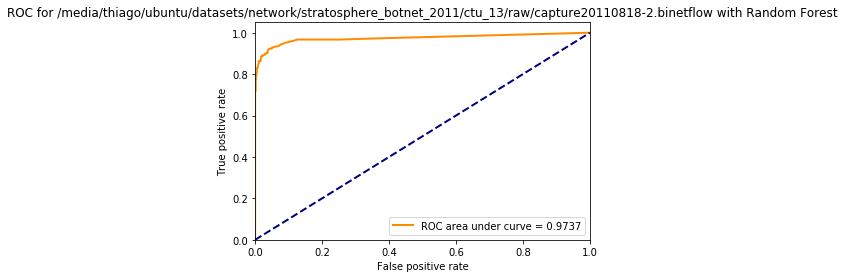

saved_data/saved_0.25s_19.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9469308734768249


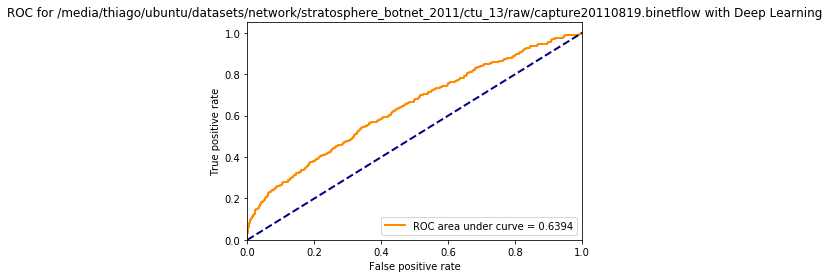

accuracy: 0.9473864024598565
precision: 0.5052083333333334
recall: 0.41630901287553645
f1: 0.45647058823529413


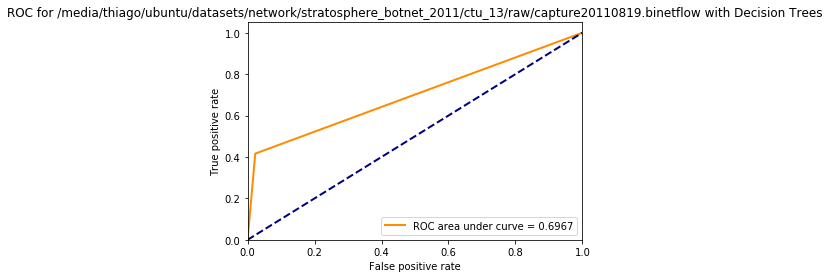

accuracy: 0.956952511103519
precision: 1.0
recall: 0.1888412017167382
f1: 0.3176895306859206


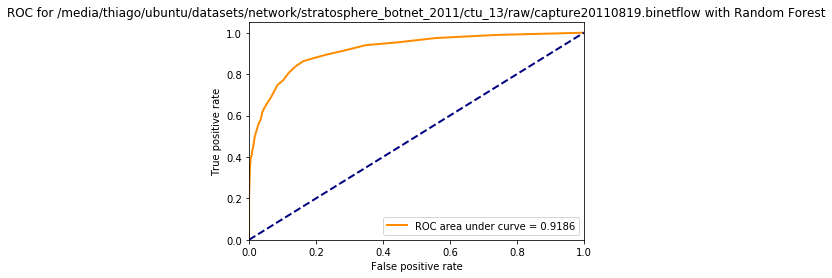

saved_data/saved_0.25s_15-3.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.966112515422077


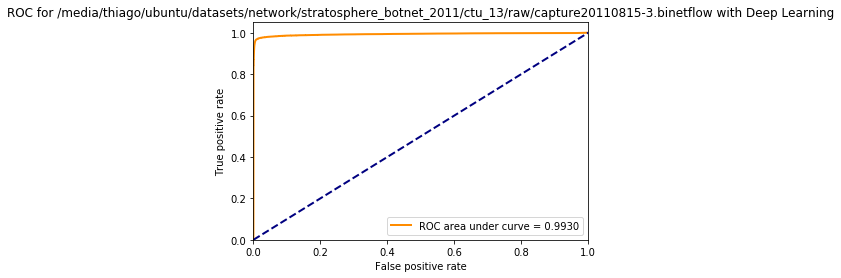

accuracy: 0.9952119261860188
precision: 0.9843651095075326
recall: 0.9805788511255439
f1: 0.9824683324383233


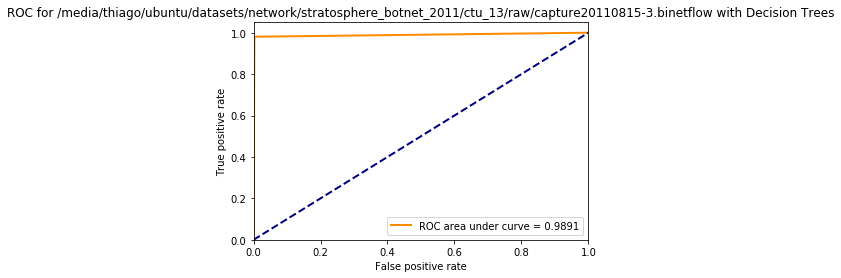

accuracy: 0.996350711309344
precision: 0.9955059065228556
recall: 0.977741345608172
f1: 0.9865436615237791


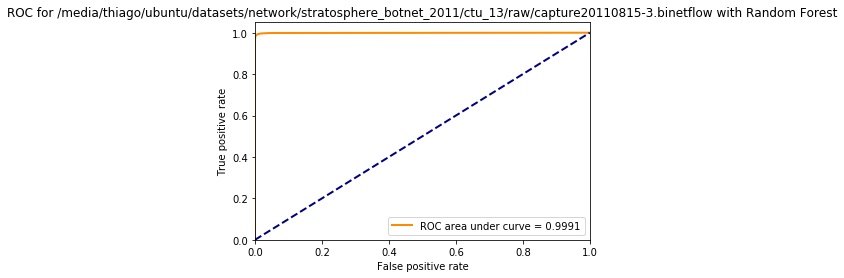

In [7]:
# evaluate ROC-AUC of algorithms for each scenario aggredate by 0.25s, with 50% for testing
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(0.25, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)


saved_data/saved_1s_10.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.6310150717160696


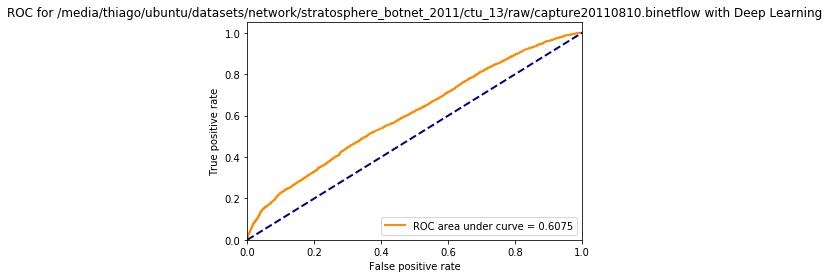

accuracy: 0.7146359179226439
precision: 0.6415267877673029
recall: 0.6378600823045267
f1: 0.6396881806717872


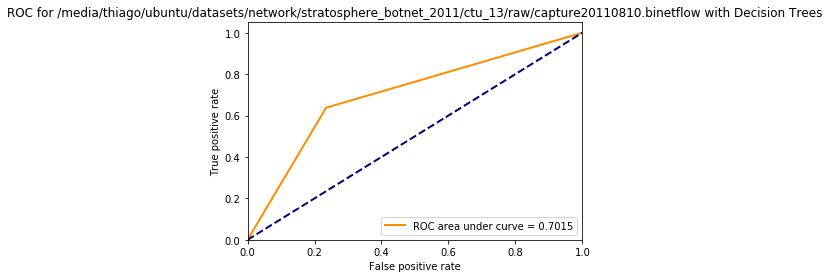

accuracy: 0.7854548756128563
precision: 0.8127527216174184
recall: 0.5973936899862826
f1: 0.6886282777704573


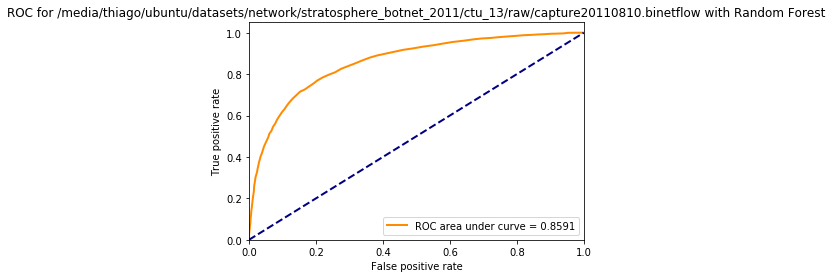

saved_data/saved_1s_11.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.6847562617829248


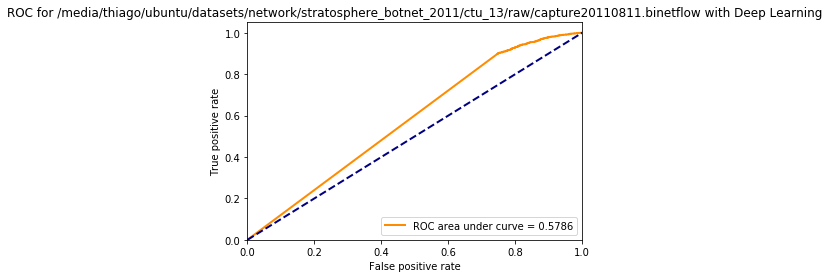

accuracy: 0.7177484513870186
precision: 0.5538461538461539
recall: 0.5382315249893208
f1: 0.5459272097053727


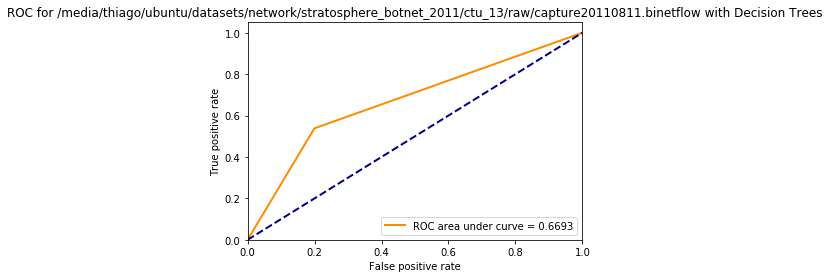

accuracy: 0.7938324804740102
precision: 0.8250401284109149
recall: 0.4391285775309697
f1: 0.5731809311402285


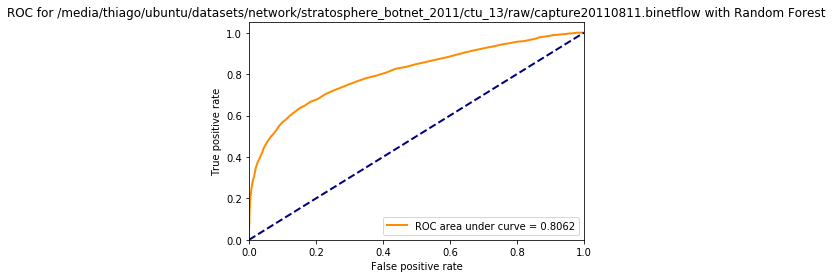

saved_data/saved_1s_12.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9789001009923963


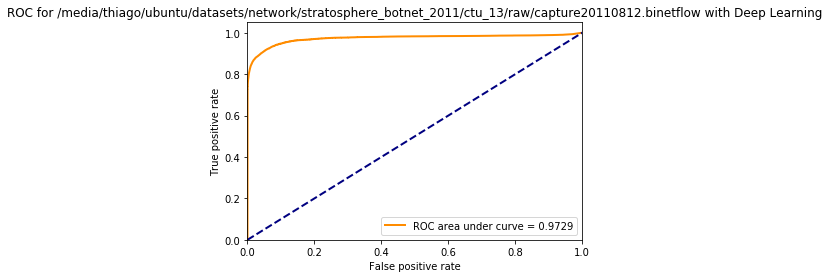

accuracy: 0.9548038160102161
precision: 0.748511454233525
recall: 0.717311411992263
f1: 0.7325793866363771


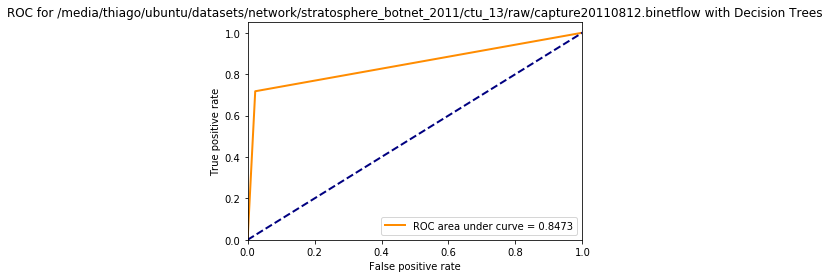

accuracy: 0.9716720501456461
precision: 0.9264489194499018
recall: 0.7296905222437138
f1: 0.8163817355550748


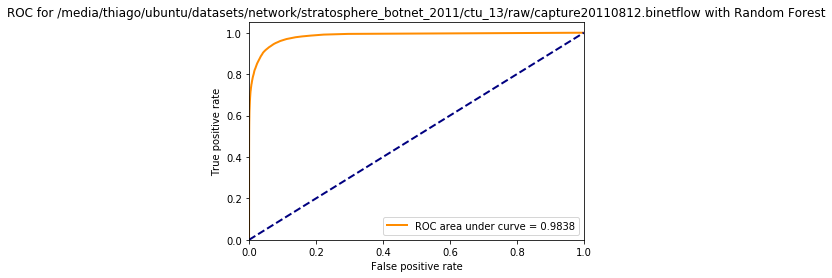

saved_data/saved_1s_15.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9295681063122924


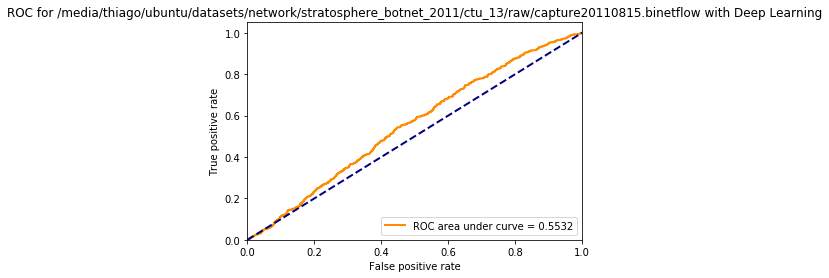

accuracy: 0.892624584717608
precision: 0.22529644268774704
recall: 0.21509433962264152
f1: 0.2200772200772201


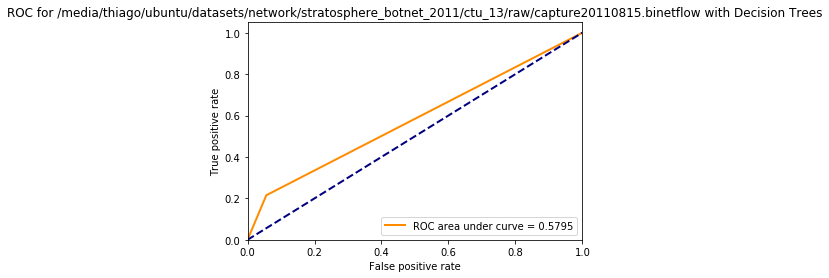

accuracy: 0.9297009966777409
precision: 0.5087719298245614
recall: 0.05471698113207547
f1: 0.09880749574105623


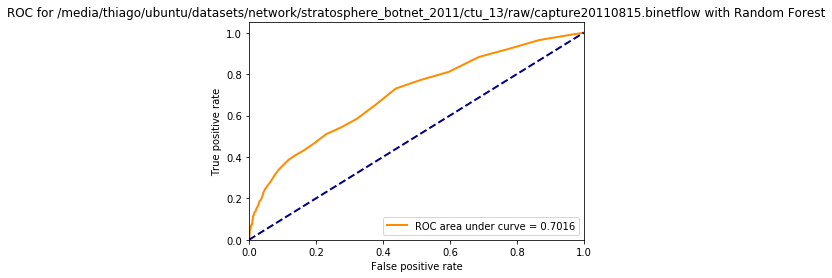

saved_data/saved_1s_15-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.7033333333333334


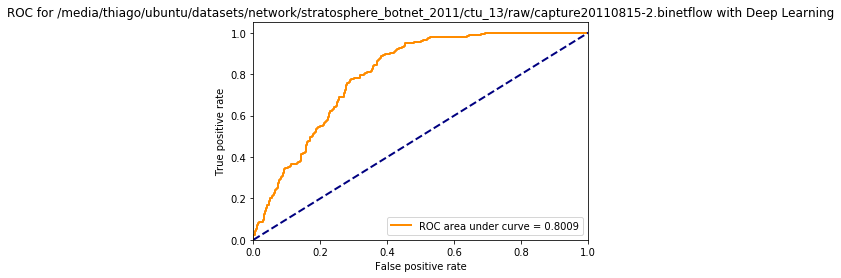

accuracy: 0.7177777777777777
precision: 0.5391304347826087
recall: 0.45588235294117646
f1: 0.4940239043824701


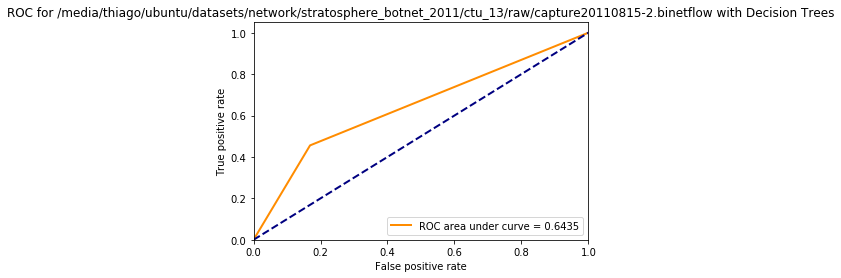

accuracy: 0.76
precision: 0.6386138613861386
recall: 0.4742647058823529
f1: 0.5443037974683544


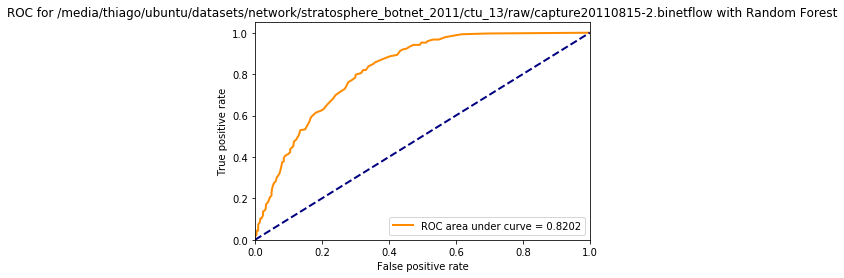

saved_data/saved_1s_16.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9025479377897386


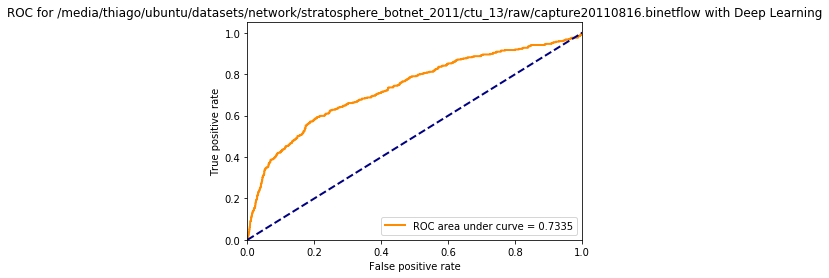

accuracy: 0.8888888888888888
precision: 0.42777777777777776
recall: 0.41509433962264153
f1: 0.42134062927496585


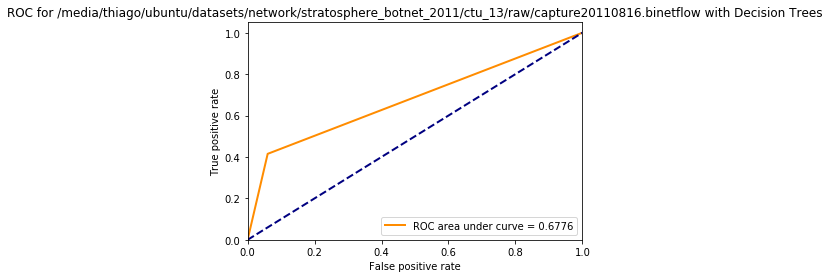

accuracy: 0.9340688205936433
precision: 0.9477611940298507
recall: 0.3423180592991914
f1: 0.502970297029703


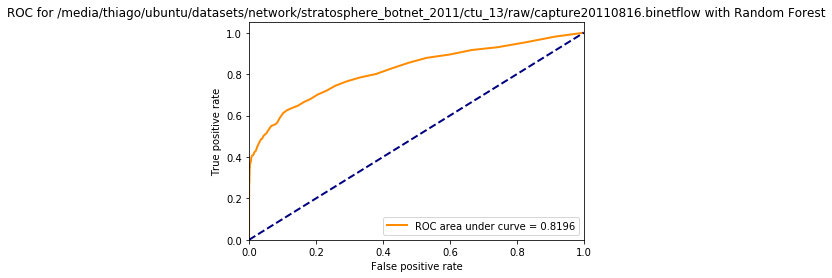

saved_data/saved_1s_16-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9806451612903225


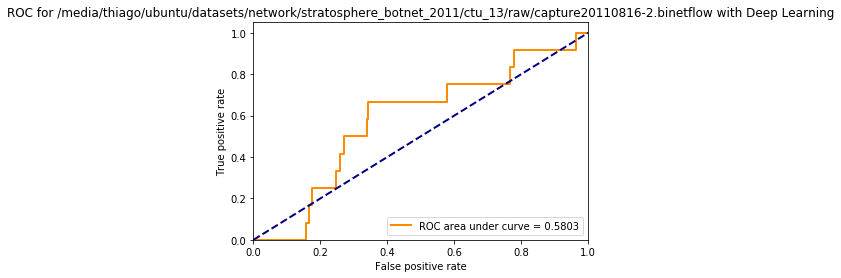

accuracy: 0.9725806451612903
precision: 0.14285714285714285
recall: 0.08333333333333333
f1: 0.10526315789473685


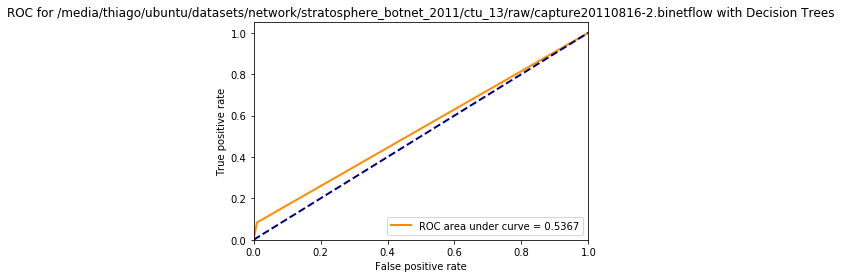

accuracy: 0.9806451612903225
precision: 0.0
recall: 0.0
f1: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


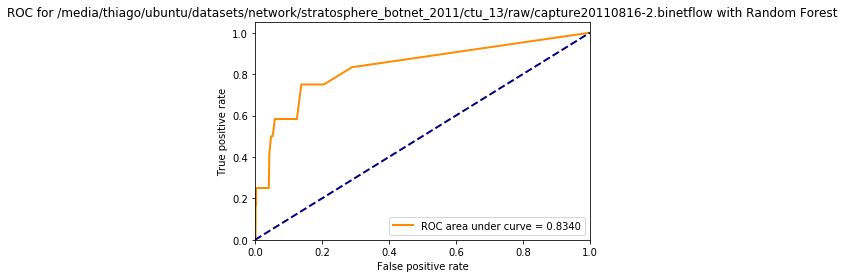

saved_data/saved_1s_16-3.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.964659048600968


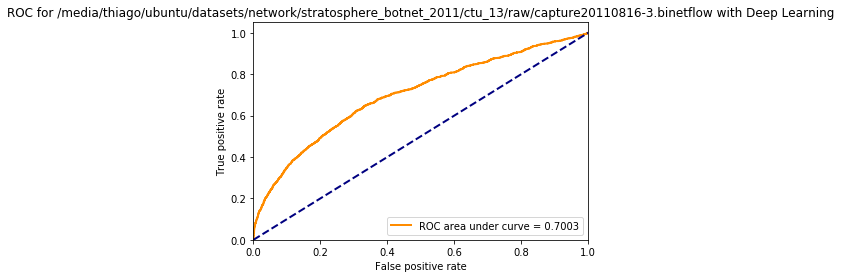

accuracy: 0.952659163158347
precision: 0.3195521102497847
recall: 0.3006482982171799
f1: 0.309812108559499


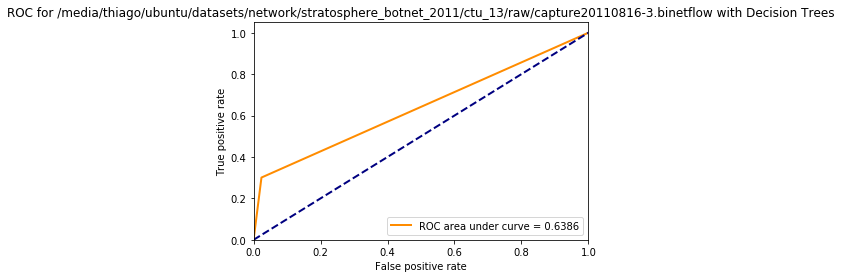

accuracy: 0.9697282126184953
precision: 0.9783783783783784
recall: 0.146677471636953
f1: 0.2551092318534179


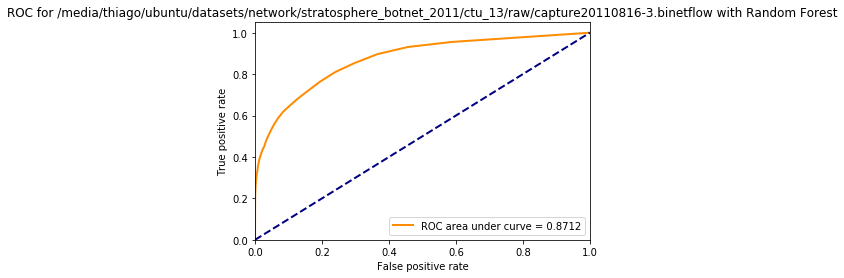

saved_data/saved_1s_17.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9103869653767821


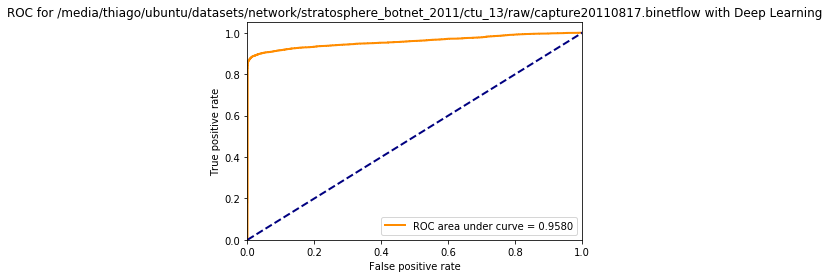

accuracy: 0.8879837067209776
precision: 0.8826898599915146
recall: 0.8942617666021921
f1: 0.8884381338742393


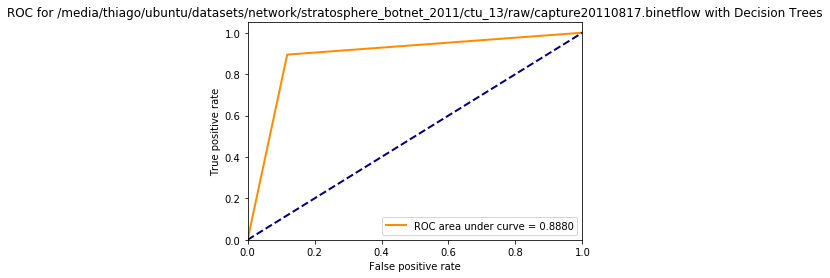

accuracy: 0.936220388037303
precision: 0.9668660837551771
recall: 0.9030732860520094
f1: 0.9338815423935992


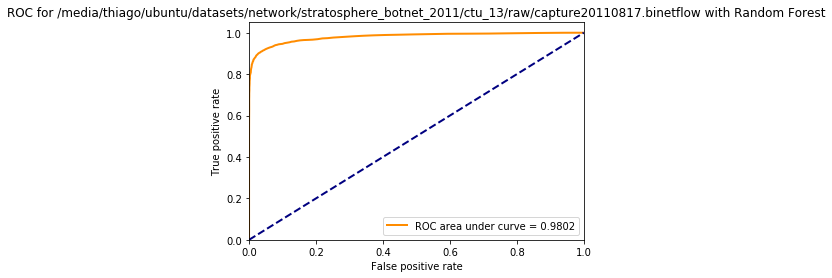

saved_data/saved_1s_18.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9738213693437574


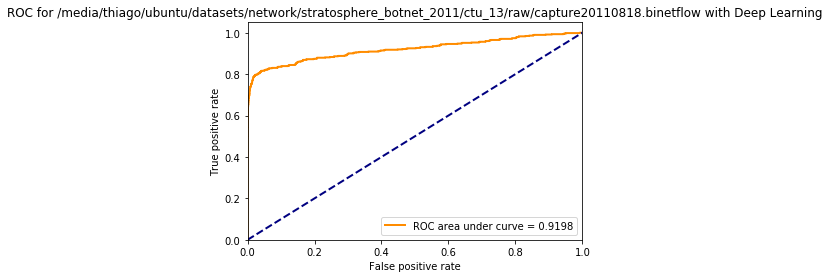

accuracy: 0.9673063255152807
precision: 0.7521367521367521
recall: 0.7705779334500875
f1: 0.7612456747404844


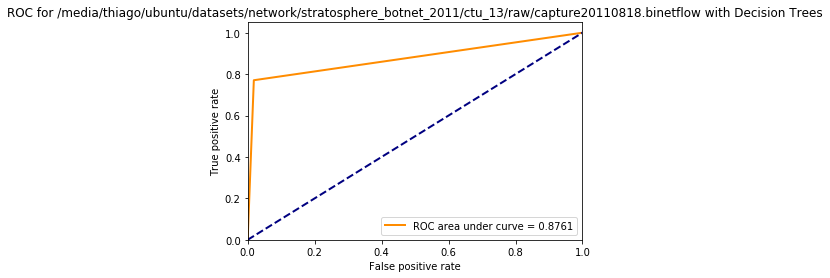

accuracy: 0.9798625918028903
precision: 0.9311827956989247
recall: 0.7583187390542907
f1: 0.8359073359073359


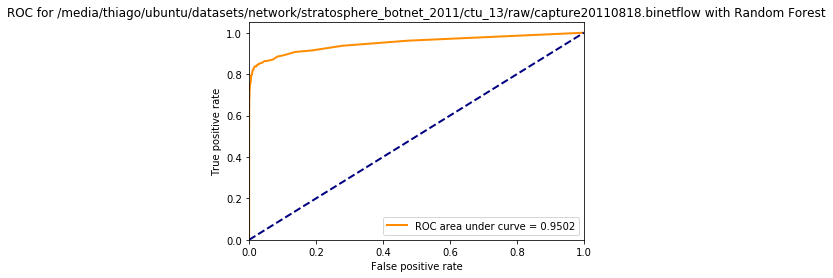

saved_data/saved_1s_18-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9596412537343834


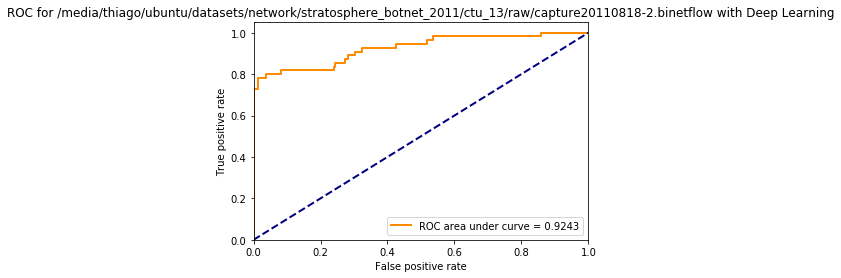

accuracy: 0.9439461883408071
precision: 0.7884615384615384
recall: 0.7454545454545455
f1: 0.766355140186916


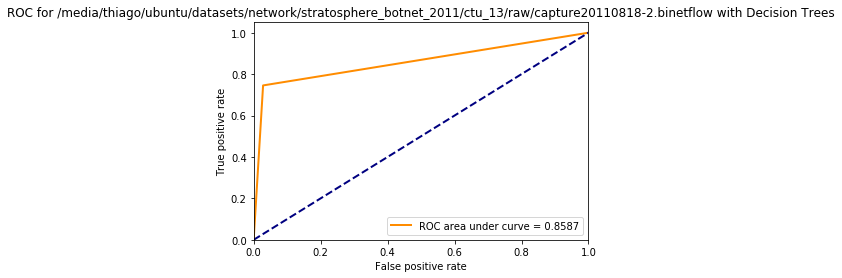

accuracy: 0.9618834080717489
precision: 0.9130434782608695
recall: 0.7636363636363637
f1: 0.8316831683168316


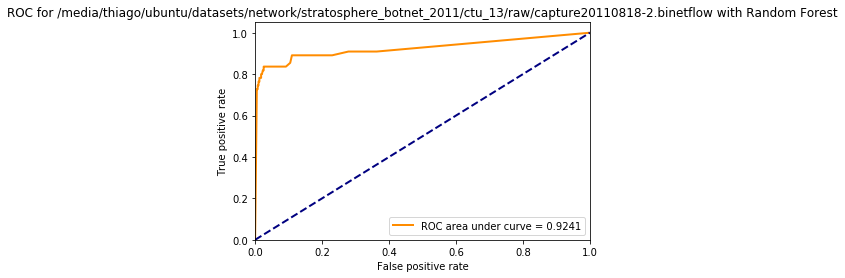

saved_data/saved_1s_19.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.8720400727511756


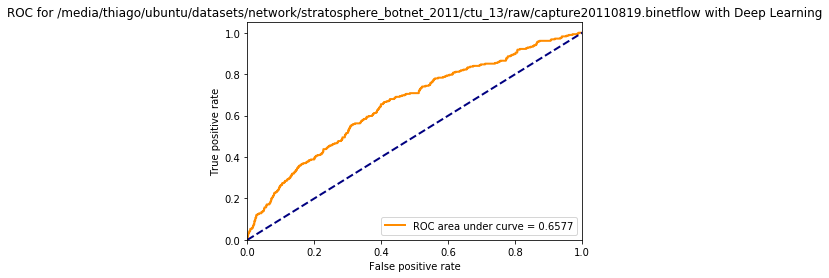

accuracy: 0.7928051001821493
precision: 0.22468354430379747
recall: 0.2526690391459075
f1: 0.23785594639865995


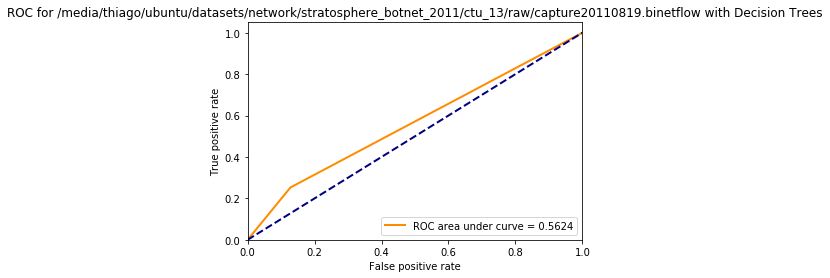

accuracy: 0.8752276867030966
precision: 0.6521739130434783
recall: 0.05338078291814947
f1: 0.09868421052631578


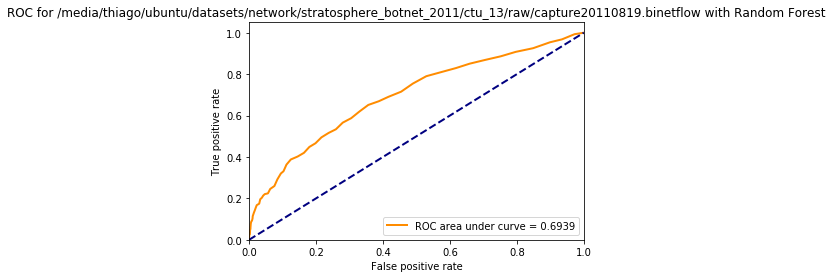

saved_data/saved_1s_15-3.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.6247412184007742


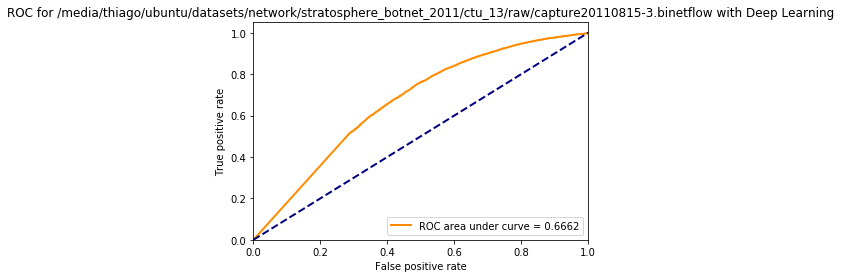

accuracy: 0.8837264551162396
precision: 0.8750275027502751
recall: 0.8738738738738738
f1: 0.8744503078276166


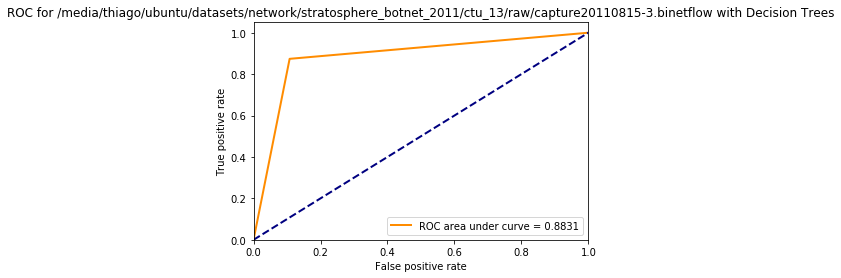

accuracy: 0.9293738333616155
precision: 0.9433716475095786
recall: 0.9017065846334139
f1: 0.9220686814215632


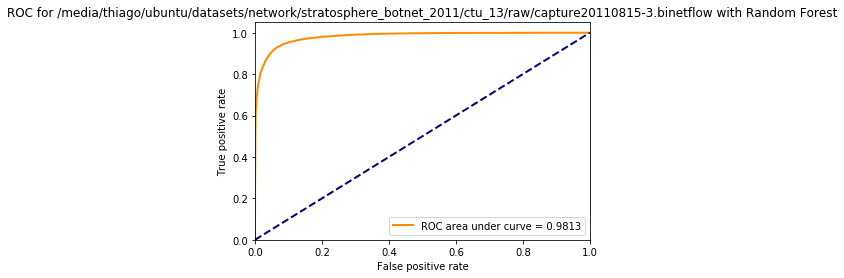

In [8]:
# evaluate ROC-AUC of algorithms for each scenario aggredate by 1s, with 50% for testing
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(1, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)

saved_data/saved_2s_10.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.5291447248955874


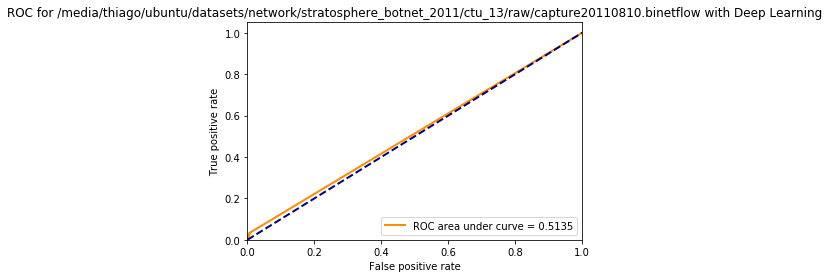

accuracy: 0.6504448883239513
precision: 0.6648882960986996
recall: 0.6842827728208648
f1: 0.6744461356333502


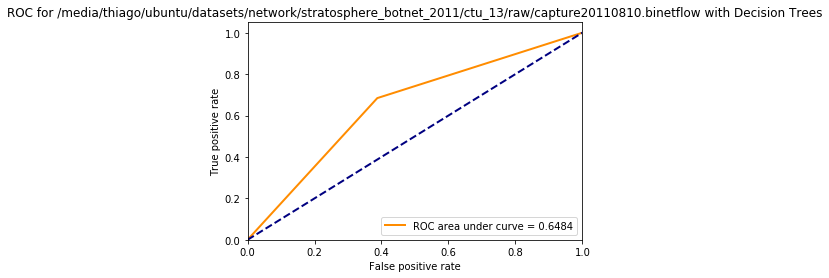

accuracy: 0.7167241692391502
precision: 0.7147842639593909
recall: 0.7731640356897735
f1: 0.7428288822947577


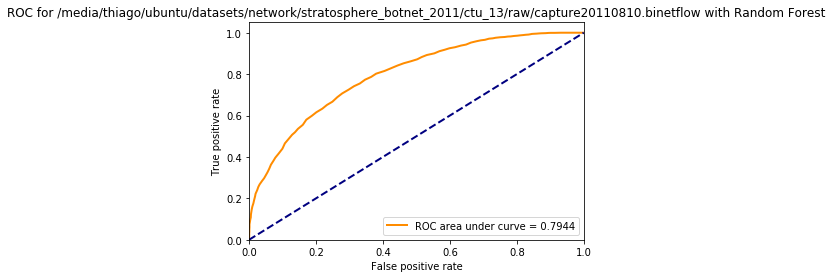

saved_data/saved_2s_11.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.5580393213035282


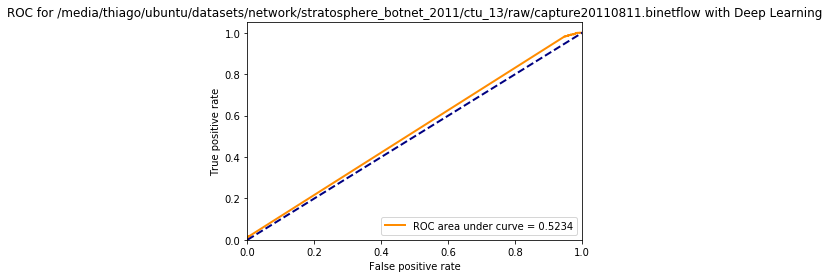

accuracy: 0.5706975491516294
precision: 0.5206874602164226
recall: 0.49306811332127787
f1: 0.506501547987616


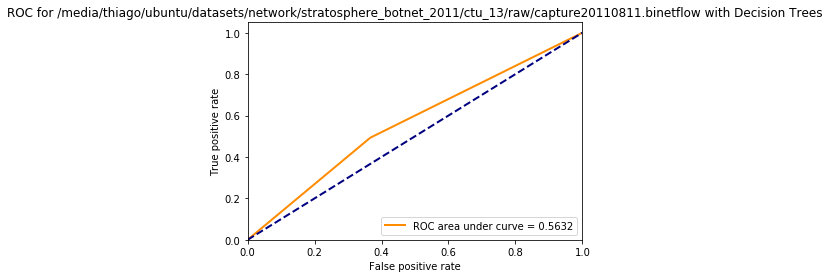

accuracy: 0.6426070562887153
precision: 0.6118598382749326
recall: 0.5473176612417119
f1: 0.5777919185491568


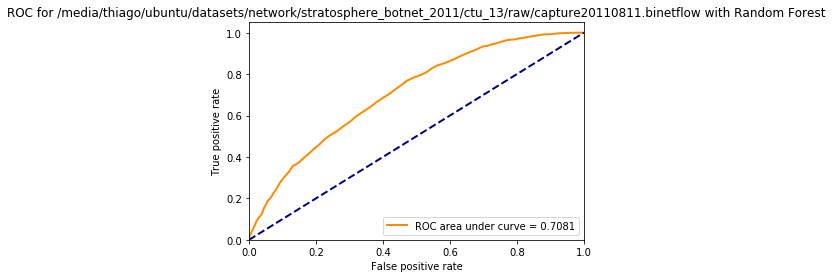

saved_data/saved_2s_12.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.8742513973915358


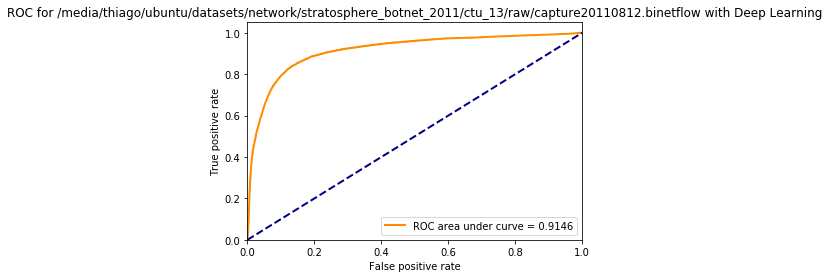

accuracy: 0.8943472185254192
precision: 0.6065384615384616
recall: 0.5904155746911269
f1: 0.5983684310377537


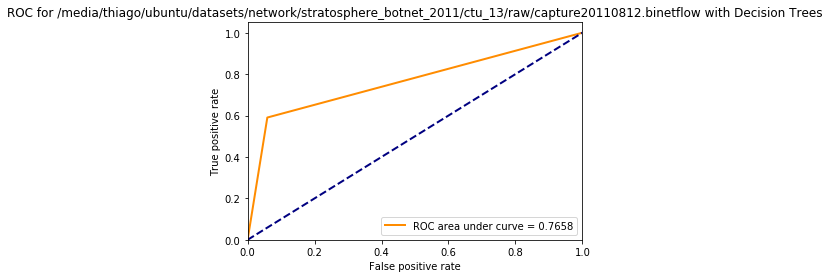

accuracy: 0.9253060952887943
precision: 0.7598465850420416
recall: 0.6428304005990266
f1: 0.6964575446187128


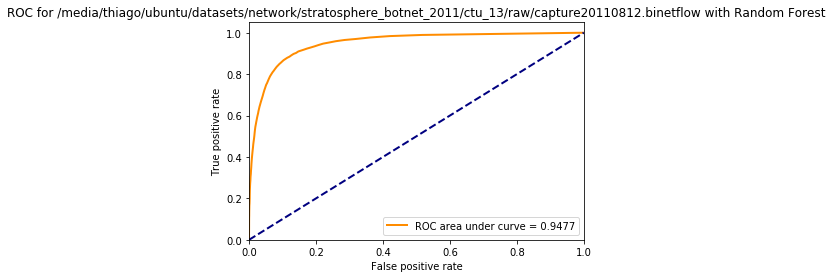

saved_data/saved_2s_15.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.8828062717026927


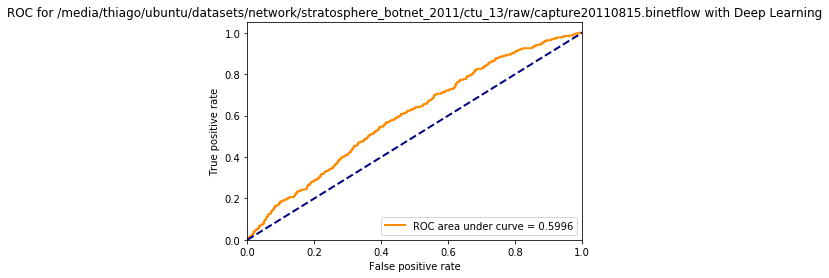

accuracy: 0.821419080520861
precision: 0.20460358056265984
recall: 0.18140589569160998
f1: 0.1923076923076923


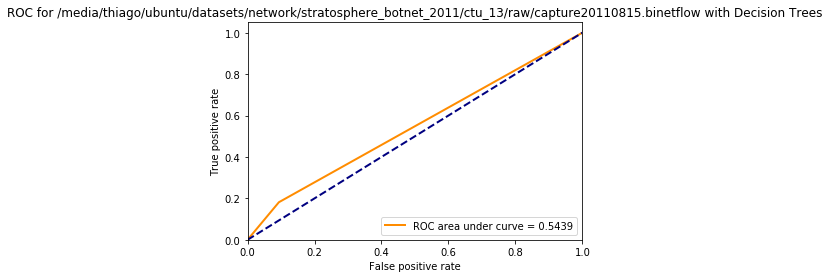

accuracy: 0.8833377624235982
precision: 0.5357142857142857
recall: 0.034013605442176874
f1: 0.06396588486140725


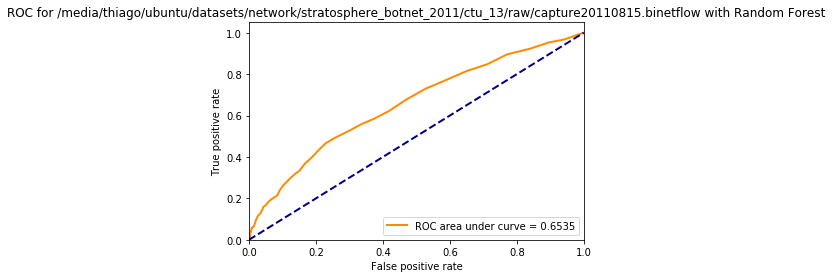

saved_data/saved_2s_15-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.8177777777777778


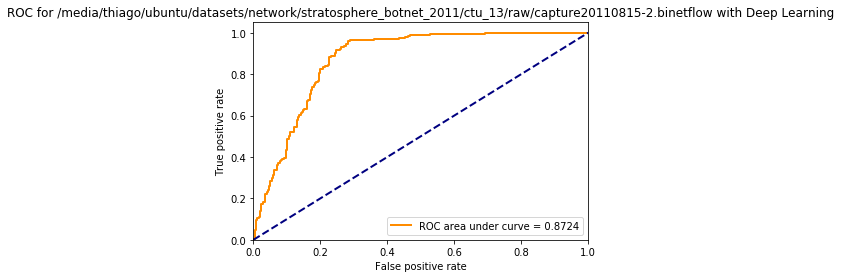

accuracy: 0.7644444444444445
precision: 0.6929824561403509
recall: 0.8144329896907216
f1: 0.7488151658767773


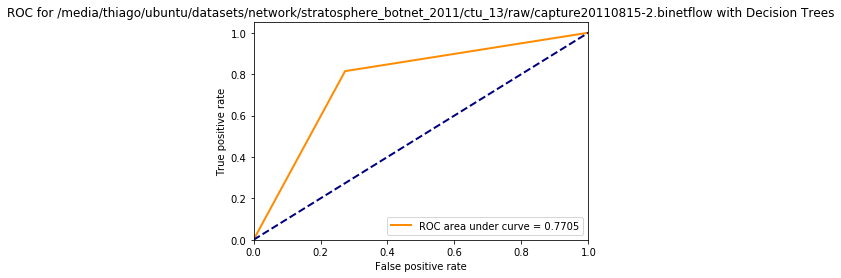

accuracy: 0.7866666666666666
precision: 0.7207207207207207
recall: 0.8247422680412371
f1: 0.7692307692307693


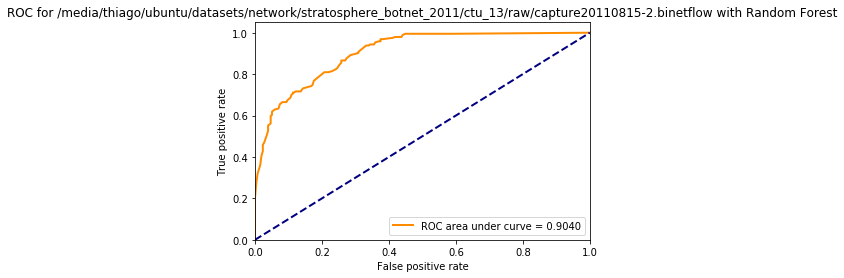

saved_data/saved_2s_16.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.7930672268907563


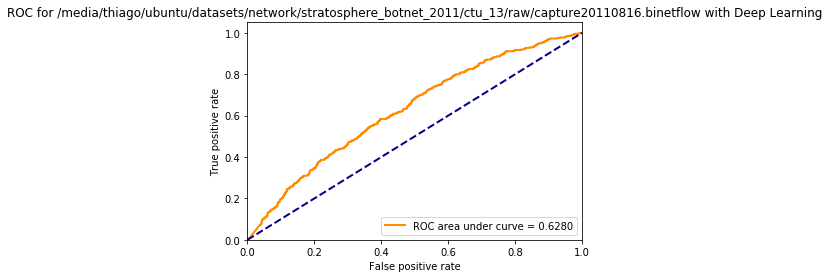

accuracy: 0.7289915966386554
precision: 0.3526570048309179
recall: 0.37055837563451777
f1: 0.36138613861386143


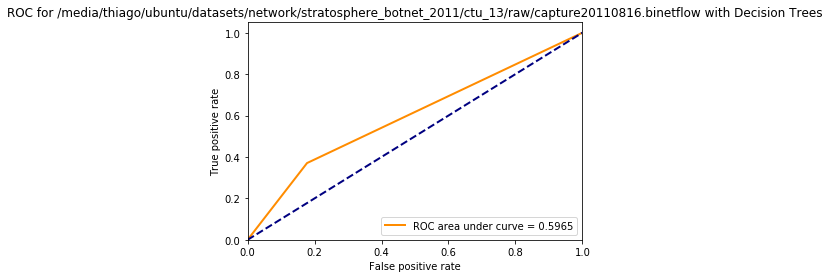

accuracy: 0.8324579831932774
precision: 0.8504672897196262
recall: 0.23096446700507614
f1: 0.36327345309381237


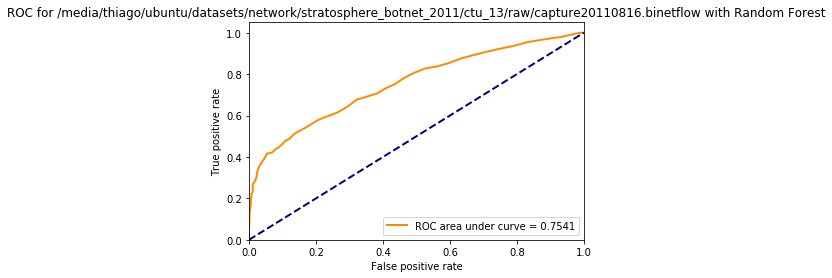

saved_data/saved_2s_16-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9741935483870968


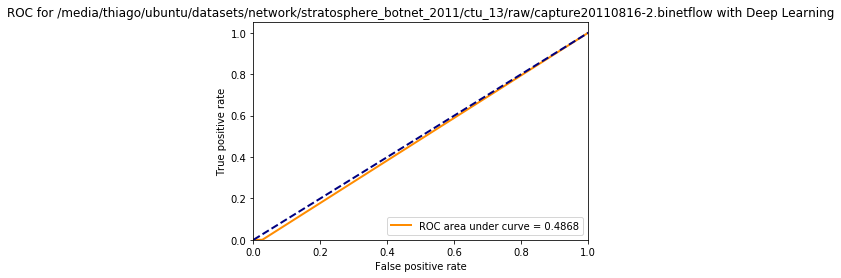

accuracy: 0.9387096774193548
precision: 0.07692307692307693
recall: 0.125
f1: 0.09523809523809525


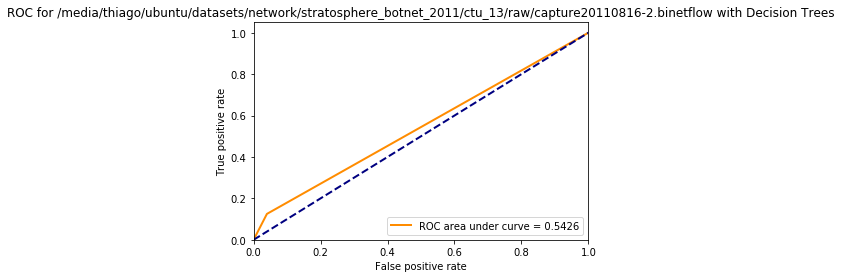

accuracy: 0.9709677419354839
precision: 0.0
recall: 0.0
f1: 0.0


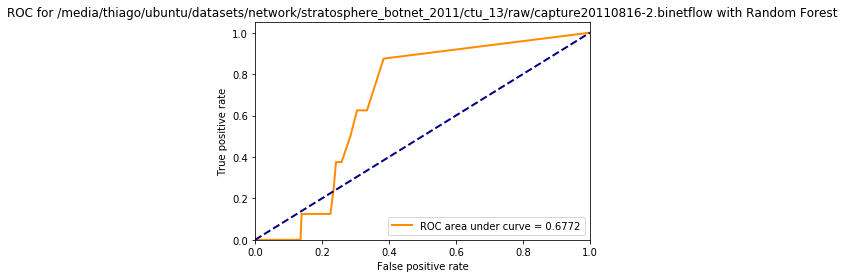

saved_data/saved_2s_16-3.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9398590984421775


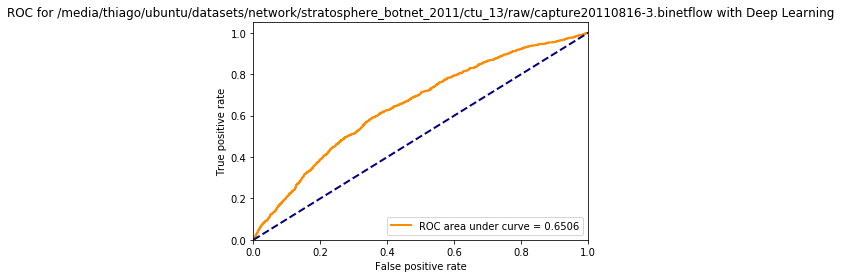

accuracy: 0.900738873933215
precision: 0.17507136060894388
recall: 0.17523809523809525
f1: 0.1751546882436935


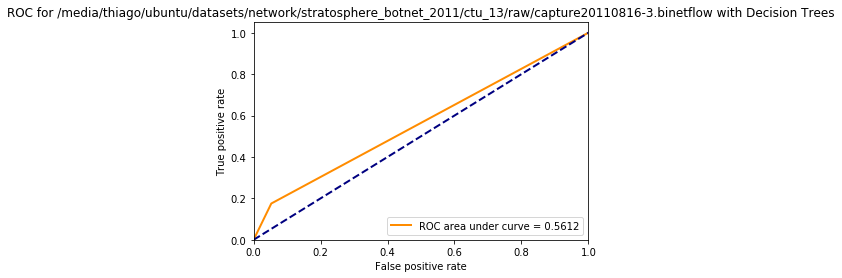

accuracy: 0.9451285869751991
precision: 0.9893617021276596
recall: 0.08857142857142856
f1: 0.16258741258741255


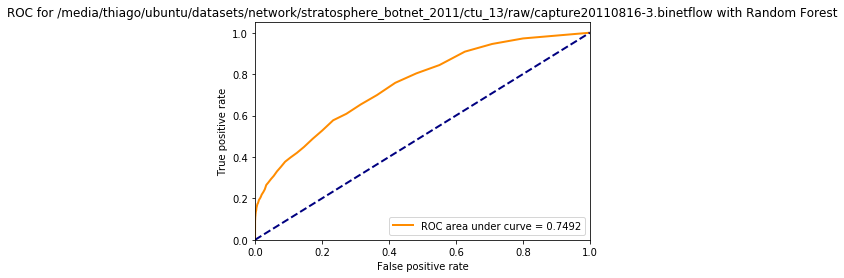

saved_data/saved_2s_17.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.8945337620067698


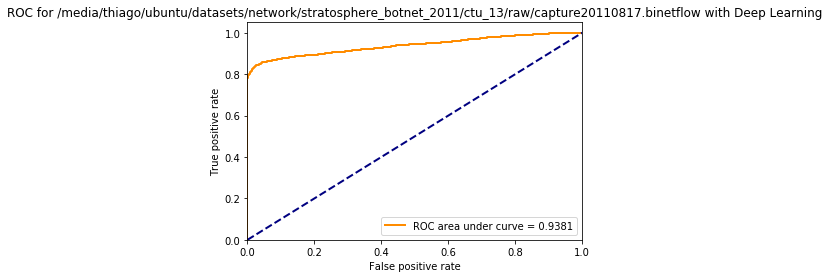

accuracy: 0.854876741693462
precision: 0.854235880398671
recall: 0.8631976500209819
f1: 0.8586933834272594


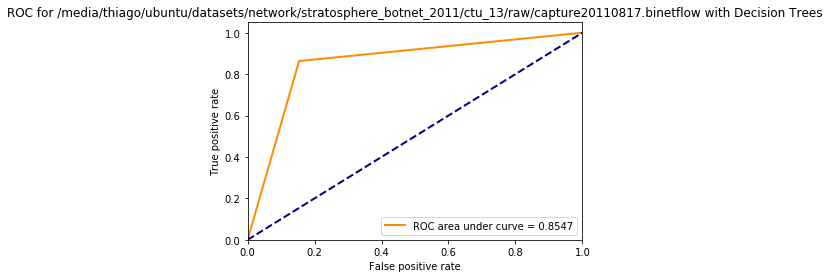

accuracy: 0.9204715969989282
precision: 0.9736346516007532
recall: 0.8678136802349979
f1: 0.9176836032837808


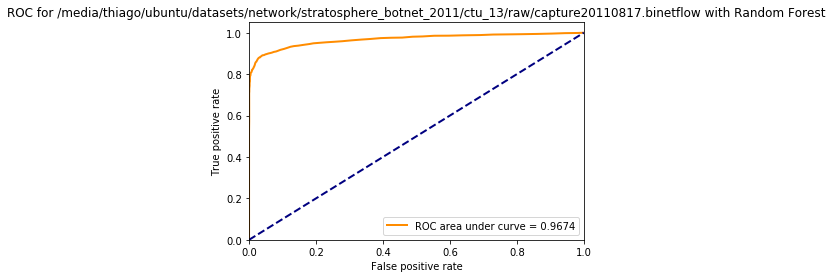

saved_data/saved_2s_18.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.9681001890359168


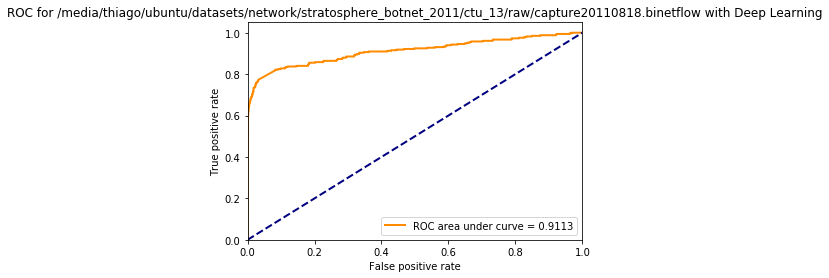

accuracy: 0.9515595463137996
precision: 0.688622754491018
recall: 0.6948640483383686
f1: 0.6917293233082706


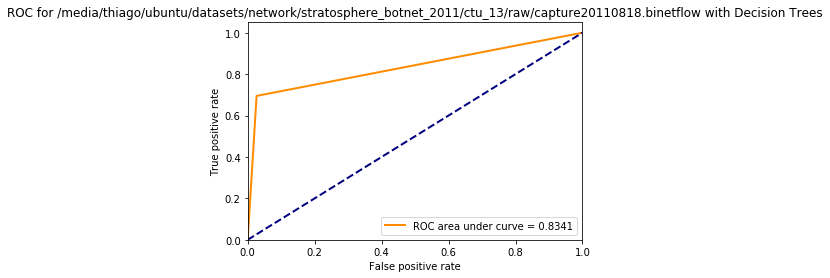

accuracy: 0.974007561436673
precision: 0.9510204081632653
recall: 0.7039274924471299
f1: 0.8090277777777779


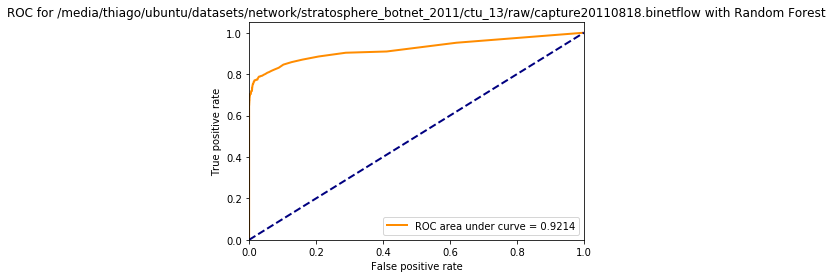

saved_data/saved_2s_18-2.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.90625


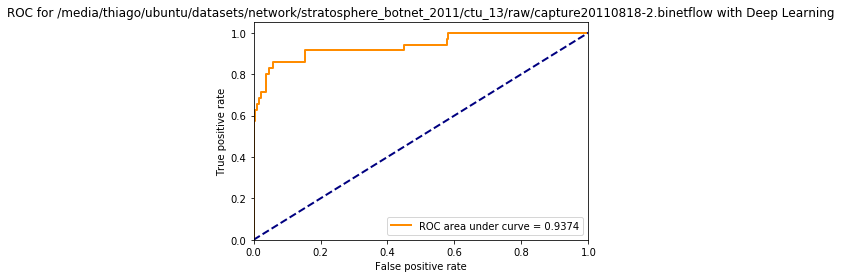

accuracy: 0.9419642857142857
precision: 0.7894736842105263
recall: 0.8571428571428571
f1: 0.8219178082191781


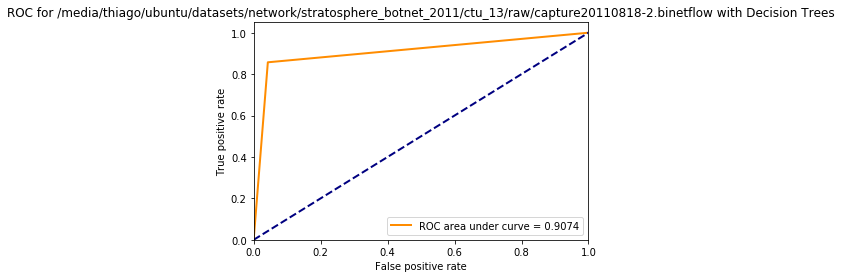

accuracy: 0.9642857142857143
precision: 0.9354838709677419
recall: 0.8285714285714286
f1: 0.8787878787878788


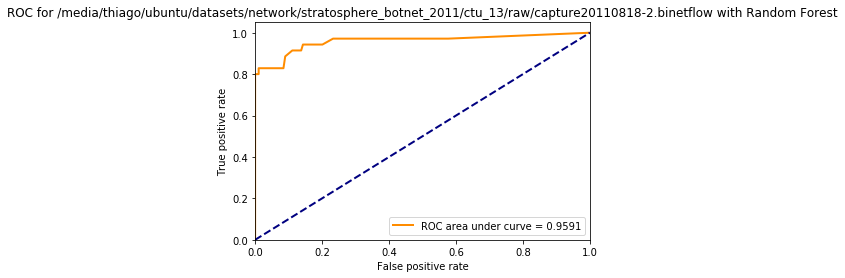

saved_data/saved_2s_19.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.8051001821493625


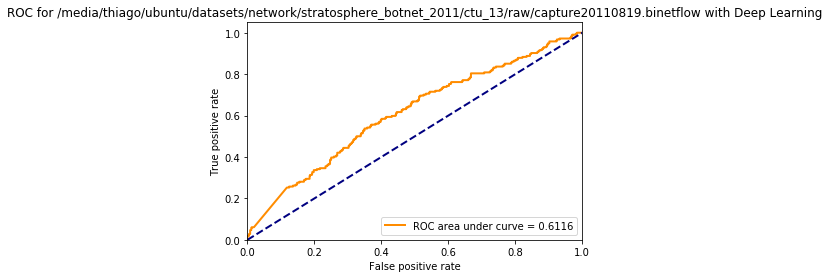

accuracy: 0.714936247723133
precision: 0.27802690582959644
recall: 0.2897196261682243
f1: 0.2837528604118993


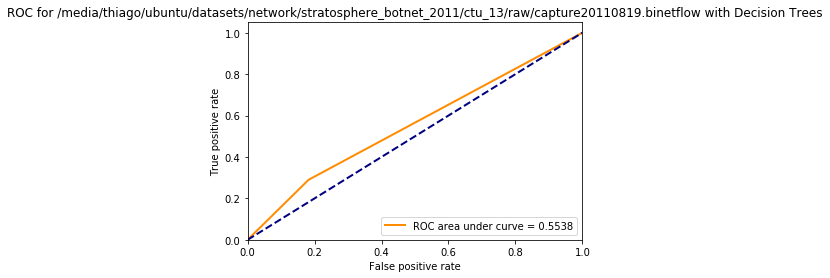

accuracy: 0.8032786885245902
precision: 0.4772727272727273
recall: 0.09813084112149532
f1: 0.16279069767441862


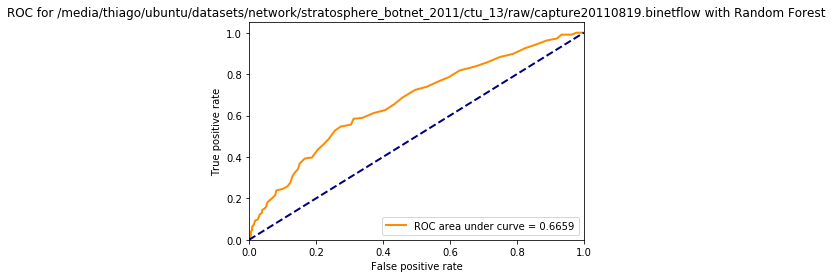

saved_data/saved_2s_15-3.pk1


/home/thiago/dev/anomaly-detection/network-attack-detection/BinetflowTrainer-master/binet_keras.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_dim=17, activation="relu", kernel_initializer="uniform")`
  model.add(Dense(64, input_dim=dimension, init='uniform', activation='relu'))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


0.8206068010669388


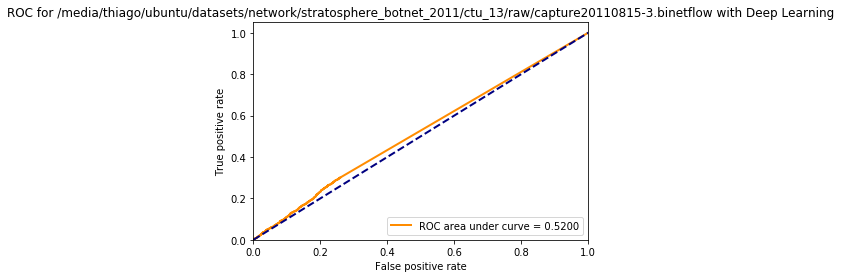

accuracy: 0.7853118848842734
precision: 0.8688538137344021
recall: 0.8696443341604632
f1: 0.8692488942168576


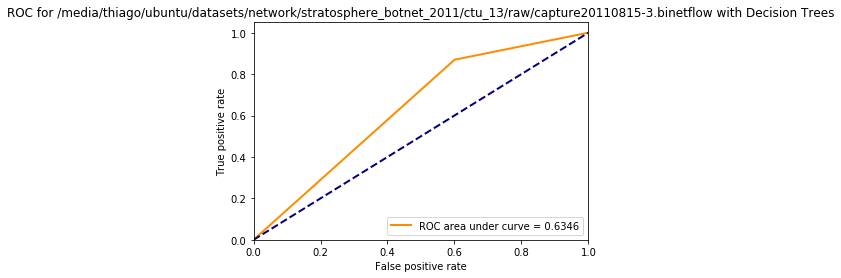

accuracy: 0.838390008823729
precision: 0.8425174627813448
recall: 0.9876757650951199
f1: 0.9093401363134447


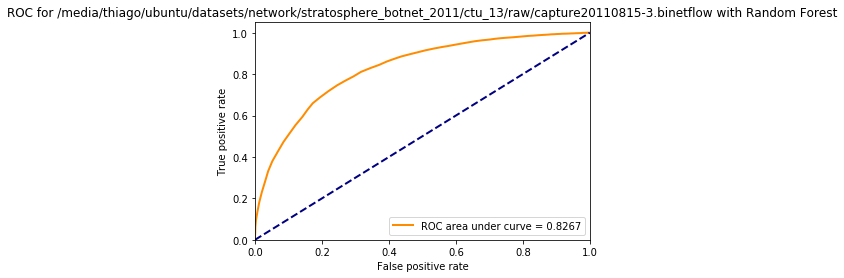

In [9]:
# evaluate ROC-AUC of algorithms for each scenario aggredate by 2s, with 50% for testing
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(2, binet))
    plot_roc_curve('tf', feature, label, binet)
    plot_roc_curve('dt', feature, label, binet)
    plot_roc_curve('rf', feature, label, binet)